In [642]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re

In [28]:
cov_w=pd.read_csv('cov/covid_worldwide.csv',index_col='Serial Number')
cov_w

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
Serial Number,,,,,,,
1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...
227,Diamond Princess,712,13,699,0,NaN,NaN
228,Vatican City,29,NaN,29,0,NaN,799
229,Western Sahara,10,1,9,0,NaN,"626,161"


In [8]:
cov_api=pd.read_csv('cov/API_8_DS2_en_csv_v2_4770564.csv')
cov_api

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,Completeness of death registration with cause-...,SP.REG.DTHS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,Completeness of birth registration (%),SP.REG.BRTH.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Completeness of birth registration, urban (%)",SP.REG.BRTH.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Completeness of birth registration, rural (%)",SP.REG.BRTH.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67825,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.NEGL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67826,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.GOES.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67827,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.BURN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67828,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
cov_g = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
cov_g

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256076,ZWE,Africa,Zimbabwe,2023-02-04,262324.0,0.0,102.571,5658.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
256077,ZWE,Africa,Zimbabwe,2023-02-05,262324.0,0.0,102.571,5658.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
256078,ZWE,Africa,Zimbabwe,2023-02-06,262324.0,0.0,102.571,5658.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
256079,ZWE,Africa,Zimbabwe,2023-02-07,262324.0,0.0,102.571,5658.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [83]:
cov_o=pd.read_csv('cov/의료종사자수_OECD__20230209134829.csv', encoding='cp949')
cov_o.iloc[:,1:]=cov_o.iloc[:,1:].astype(float)

In [85]:
cov_o=cov_o.rename(columns ={'간호사':'2021 간호사'})

In [88]:
cov_o

,국가별,2019 의사,2019 천명당 의사,2019 약사,2019 천명당 약사,2019 치과의사,2019 천명당 치과의사,2019 간호사,2019 천명당 간호사,2020 의사,...,2020 간호사,2020 천명당 간호사,2021 의사,2021 천명당 의사,2021 약사,2021 천명당 약사,2021 치과의사,2021 천명당 치과의사,2021 간호사,2021 천명당 간호사
0,KOR,127258.0,2.5,38941.0,0.8,26486.0,0.5,410694.0,7.9,130014.0,...,433993.0,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ISR,29803.0,3.3,8500.0,0.9,7500.0,0.8,45400.0,5.0,30529.0,...,47400.0,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327403.0,...,1526740.0,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAN,102850.0,2.7,38966.0,1.0,24590.0,0.7,375312.0,10.0,103739.0,...,382839.0,10.1,106042.0,2.8,NaN,NaN,NaN,NaN,NaN,NaN
4,MEX,309414.0,2.4,NaN,NaN,16870.0,0.1,360210.0,2.9,307497.0,...,372464.0,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,USA,866316.0,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AUT,47224.0,5.3,6479.0,0.7,5143.0,0.6,92115.0,10.4,47674.0,...,93477.0,10.5,48705.0,5.5,NaN,NaN,NaN,NaN,NaN,NaN
7,BEL,36343.0,3.2,14554.0,1.3,8697.0,0.8,NaN,NaN,37089.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CZE,43399.0,4.1,7686.0,0.7,7825.0,0.7,91354.0,8.6,43810.0,...,92664.0,8.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,DNK,24715.0,4.3,2577.0,0.4,4190.0,0.7,58910.0,10.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
cov_o2=pd.read_csv('cov/의료종사자수_OECD22.csv', encoding='cp949',header=[0,1])

In [114]:
pd.melt(cov_o2, id_vars='국가별')

ValueError: Per-column arrays must each be 1-dimensional

In [106]:
pd.melt(cov_o2, id_vars='년도별')

ValueError: Per-column arrays must each be 1-dimensional

In [136]:
cov_o3 = pd.melt(cov_o, id_vars='국가별')
cov_o3['년도'] = cov_o3['variable'].apply(lambda x : x[:4])
cov_o3['종류'] = cov_o3['variable'].apply(lambda x : x[5:])
cov_o3

,국가별,variable,value,년도,종류
0,KOR,2019 의사,127258.0,2019,의사
1,ISR,2019 의사,29803.0,2019,의사
2,JPN,2019 의사,NaN,2019,의사
3,CAN,2019 의사,102850.0,2019,의사
4,MEX,2019 의사,309414.0,2019,의사
...,...,...,...,...,...
715,SWE,2021 천명당 간호사,NaN,2021,천명당 간호사
716,CHE,2021 천명당 간호사,NaN,2021,천명당 간호사
717,GBR,2021 천명당 간호사,8.7,2021,천명당 간호사
718,AUS,2021 천명당 간호사,NaN,2021,천명당 간호사


In [139]:
cov_o3.drop(cov_o3.columns[1],axis=1,inplace=True)

In [149]:
cov_o3[cov_o3['국가별'] == 'JPN'][cov_o3[cov_o3['국가별'] == 'JPN']['종류']=='의사']['value'].mean()

327403.0

In [169]:
cov_o3[cov_o3['국가별'] == 'JPN'][cov_o3[cov_o3['국가별'] == 'JPN']['종류']=='의사']['value'].fillna(cov_o3[cov_o3['국가별'] == 'JPN'][cov_o3[cov_o3['국가별'] == 'JPN']['종류']=='의사']['value'].mean(),inplace=True)

In [160]:
cov_o3[cov_o3['국가별'] == 'JPN'][cov_o3[cov_o3['국가별'] == 'JPN']['종류']=='의사']['value'] = cov_o3[cov_o3['국가별'] == 'JPN'][cov_o3[cov_o3['국가별'] == 'JPN']['종류']=='의사']['value'].fillna(cov_o3[cov_o3['국가별'] == 'JPN'][cov_o3[cov_o3['국가별'] == 'JPN']['종류']=='의사']['value'].mean())

In [168]:
cov_o3[cov_o3['국가별'] == 'JPN'][cov_o3[cov_o3['국가별'] == 'JPN']['종류']=='의사']['value']

2           NaN
242    327403.0
482         NaN
Name: value, dtype: float64

In [ ]:
cov_o3[cov_o3['국가별'] == 'JPN'][cov_o3[cov_o3['국가별'] == 'JPN']['종류']=='의사']['value'].fillna()

In [131]:
pd.melt(cov_o2,id_vars='국가별')

ValueError: Per-column arrays must each be 1-dimensional

-----------------------

In [32]:
#object->int
cov_w['Total Cases']=cov_w['Total Cases'].str.replace(',','')
cov_w['Total Deaths']=cov_w['Total Deaths'].str.replace(',','')
cov_w['Total Recovered']=cov_w['Total Recovered'].str.replace(',','')
cov_w['Active Cases']=cov_w['Active Cases'].str.replace(',','')
cov_w['Total Test']=cov_w['Total Test'].str.replace(',','')
cov_w['Population']=cov_w['Population'].str.replace(',','')
cov_w

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
Serial Number,,,,,,,
1,USA,104196861,1132935,101322779,1741147,1159832679,334805269
2,India,44682784,530740,44150289,1755,915265788,1406631776
3,France,39524311,164233,39264546,95532,271490188,65584518
4,Germany,37779833,165711,37398100,216022,122332384,83883596
5,Brazil,36824580,697074,35919372,208134,63776166,215353593
...,...,...,...,...,...,...,...
227,Diamond Princess,712,13,699,0,NaN,NaN
228,Vatican City,29,NaN,29,0,NaN,799
229,Western Sahara,10,1,9,0,NaN,626161


In [52]:
#obj -> int
cov_w['Total Cases']=pd.to_numeric(cov_w['Total Cases'])
cov_w['Total Deaths']=pd.to_numeric(cov_w['Total Deaths'])
cov_w['Total Recovered']=pd.to_numeric(cov_w['Total Recovered'])
cov_w['Active Cases']=pd.to_numeric(cov_w['Active Cases'])
cov_w['Total Test']=pd.to_numeric(cov_w['Total Test'])
cov_w['Population']=pd.to_numeric(cov_w['Population'])

In [49]:
cov_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 1 to 231
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          231 non-null    object 
 1   Total Cases      231 non-null    int64  
 2   Total Deaths     225 non-null    float64
 3   Total Recovered  210 non-null    float64
 4   Active Cases     212 non-null    float64
 5   Total Test       213 non-null    float64
 6   Population       228 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 14.4+ KB


----------------------

In [80]:
new_cov1=cov_o.merge(cov_g,left_on='국가별',right_on='iso_code')
new_cov1

,국가별,2019 의사,2019 천명당 의사,2019 약사,2019 천명당 약사,2019 치과의사,2019 천명당 치과의사,2019 간호사,2019 천명당 간호사,2020 의사,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,KOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
1,KOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
2,KOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
3,KOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
4,KOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,43.4,0.17,2.47,0.837116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,NZL,16813.0,3.4,3489.0,0.7,NaN,NaN,50976.0,10.2,17448.0,...,17.2,NaN,2.61,82.29,0.931,5185289.0,NaN,NaN,NaN,NaN
32816,NZL,16813.0,3.4,3489.0,0.7,NaN,NaN,50976.0,10.2,17448.0,...,17.2,NaN,2.61,82.29,0.931,5185289.0,NaN,NaN,NaN,NaN
32817,NZL,16813.0,3.4,3489.0,0.7,NaN,NaN,50976.0,10.2,17448.0,...,17.2,NaN,2.61,82.29,0.931,5185289.0,NaN,NaN,NaN,NaN
32818,NZL,16813.0,3.4,3489.0,0.7,NaN,NaN,50976.0,10.2,17448.0,...,17.2,NaN,2.61,82.29,0.931,5185289.0,NaN,NaN,NaN,NaN


In [81]:
new_cov2=new_cov1.merge(cov_w,left_on='location',right_on='Country')
new_cov2

,국가별,2019 의사,2019 천명당 의사,2019 약사,2019 천명당 약사,2019 치과의사,2019 천명당 치과의사,2019 간호사,2019 천명당 간호사,2020 의사,...,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,ISR,29803.0,3.3,8500.0,0.9,7500.0,0.8,45400.0,5.0,30529.0,...,NaN,NaN,NaN,Israel,4786189,12193.0,4768242.0,5754.0,41373364.0,9326000.0
1,ISR,29803.0,3.3,8500.0,0.9,7500.0,0.8,45400.0,5.0,30529.0,...,NaN,NaN,NaN,Israel,4786189,12193.0,4768242.0,5754.0,41373364.0,9326000.0
2,ISR,29803.0,3.3,8500.0,0.9,7500.0,0.8,45400.0,5.0,30529.0,...,NaN,NaN,NaN,Israel,4786189,12193.0,4768242.0,5754.0,41373364.0,9326000.0
3,ISR,29803.0,3.3,8500.0,0.9,7500.0,0.8,45400.0,5.0,30529.0,...,-3.94,-1.95,-37.864746,Israel,4786189,12193.0,4768242.0,5754.0,41373364.0,9326000.0
4,ISR,29803.0,3.3,8500.0,0.9,7500.0,0.8,45400.0,5.0,30529.0,...,NaN,NaN,NaN,Israel,4786189,12193.0,4768242.0,5754.0,41373364.0,9326000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29481,NZL,16813.0,3.4,3489.0,0.7,NaN,NaN,50976.0,10.2,17448.0,...,NaN,NaN,NaN,New Zealand,2182355,3781.0,2169320.0,9254.0,7710637.0,4898203.0
29482,NZL,16813.0,3.4,3489.0,0.7,NaN,NaN,50976.0,10.2,17448.0,...,NaN,NaN,NaN,New Zealand,2182355,3781.0,2169320.0,9254.0,7710637.0,4898203.0
29483,NZL,16813.0,3.4,3489.0,0.7,NaN,NaN,50976.0,10.2,17448.0,...,NaN,NaN,NaN,New Zealand,2182355,3781.0,2169320.0,9254.0,7710637.0,4898203.0
29484,NZL,16813.0,3.4,3489.0,0.7,NaN,NaN,50976.0,10.2,17448.0,...,NaN,NaN,NaN,New Zealand,2182355,3781.0,2169320.0,9254.0,7710637.0,4898203.0


In [191]:
cov_doc2=pd.read_csv('cov/doc60-21.csv')
cov_doc2['LOCATION'].value_counts().shape[0]

39

In [192]:
cov_doc2

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,MEDICALDOC,TOT,1000HAB,A,1961,1.13,NaN
1,AUS,MEDICALDOC,TOT,1000HAB,A,1964,1.23,NaN
2,AUS,MEDICALDOC,TOT,1000HAB,A,1965,1.22,NaN
3,AUS,MEDICALDOC,TOT,1000HAB,A,1966,1.23,NaN
4,AUS,MEDICALDOC,TOT,1000HAB,A,1967,1.26,NaN
...,...,...,...,...,...,...,...,...
1410,LTU,MEDICALDOC,TOT,1000HAB,A,2016,4.47,NaN
1411,LTU,MEDICALDOC,TOT,1000HAB,A,2017,4.56,NaN
1412,LTU,MEDICALDOC,TOT,1000HAB,A,2018,4.60,NaN
1413,LTU,MEDICALDOC,TOT,1000HAB,A,2019,4.57,NaN


In [171]:
cov_doc=pd.read_csv('cov/DP_LIVE_10022023033321466.csv')

In [181]:
cov_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    112 non-null    object 
 1   INDICATOR   112 non-null    object 
 2   SUBJECT     112 non-null    object 
 3   MEASURE     112 non-null    object 
 4   FREQUENCY   112 non-null    object 
 5   TIME        112 non-null    int64  
 6   Value       112 non-null    float64
 7   Flag Codes  23 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.1+ KB


In [257]:
cov_doc[cov_doc['TIME']==2021]

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
6,AUT,MEDICALDOC,TOT,1000HAB,A,2021,5.45,NaN
13,CAN,MEDICALDOC,TOT,1000HAB,A,2021,2.82,P
26,DEU,MEDICALDOC,TOT,1000HAB,A,2021,4.53,NaN
30,HUN,MEDICALDOC,TOT,1000HAB,A,2021,3.28,P
34,ISL,MEDICALDOC,TOT,1000HAB,A,2021,4.42,NaN
38,IRL,MEDICALDOC,TOT,1000HAB,A,2021,4.05,B
42,ITA,MEDICALDOC,TOT,1000HAB,A,2021,4.13,P
54,NZL,MEDICALDOC,TOT,1000HAB,A,2021,3.53,E
58,NOR,MEDICALDOC,TOT,1000HAB,A,2021,5.18,NaN
71,CHE,MEDICALDOC,TOT,1000HAB,A,2021,4.45,NaN


In [178]:
cov_doc['LOCATION'].value_counts().shape[0]

37

### 의료 인구와 사망률의 연관성

In [259]:
newList=[]
newDict={}
i=1
for contry in cov_doc['LOCATION'].value_counts().index:
    df = cov_doc2[cov_doc2['LOCATION'] == contry]
    # plt.subplot(len(cov_doc['LOCATION'].value_counts()),1,i)
    # sns.regplot('TIME', 'Value', data=df)
    # sns.kdeplot(df,shape=True)
    nl=stats.pearsonr(df['TIME'], df['Value'])
    newDict={'LOCATION':contry,'PearsonRResult':nl}
    newList.append(newDict)
    i+=1
print(newList)

[{'LOCATION': 'ISL', 'PearsonRResult': PearsonRResult(statistic=0.9842309421713542, pvalue=7.5800292557980425e-47)}, {'LOCATION': 'AUT', 'PearsonRResult': PearsonRResult(statistic=0.9894178118396504, pvalue=5.182856257450184e-52)}, {'LOCATION': 'CAN', 'PearsonRResult': PearsonRResult(statistic=0.969353454699768, pvalue=1.1442971945353854e-37)}, {'LOCATION': 'NOR', 'PearsonRResult': PearsonRResult(statistic=0.9893925089928794, pvalue=4.4775759747097086e-30)}, {'LOCATION': 'NZL', 'PearsonRResult': PearsonRResult(statistic=0.9749810098407632, pvalue=1.5642593467515708e-14)}, {'LOCATION': 'GBR', 'PearsonRResult': PearsonRResult(statistic=0.9849364402225211, pvalue=1.9393567772853416e-47)}, {'LOCATION': 'BRA', 'PearsonRResult': PearsonRResult(statistic=0.9918504095706657, pvalue=5.096279258865476e-13)}, {'LOCATION': 'DEU', 'PearsonRResult': PearsonRResult(statistic=0.9877437433613724, pvalue=6.0175391304655615e-25)}, {'LOCATION': 'HUN', 'PearsonRResult': PearsonRResult(statistic=0.936044059

#### 가정 1 , 2020년도와 2022년도 사이에 보건인구수는 일정하게 증가할 것이다.
* cov_o 에서 년도별 순위 ~ 데이터 분석 1번
#### 기장 2, 2020년도에 보건인구수 비율이 높으면, 코로나 사망률이 낮을 것이다.


In [201]:
#가설 1, 2020년과 2022년도 사이에 보건 인구수는 비슷한 비율로 증가할 것이다.
#-> 1961년 부터 2020년 사이의 보건 인구수의 변화를 통한 예측
cov_doc2['LOCATION'] == 'AUS'

0        True
1        True
2        True
3        True
4        True
        ...  
1410    False
1411    False
1412    False
1413    False
1414    False
Name: LOCATION, Length: 1415, dtype: bool

In [197]:
AUSNEW=cov_doc2[cov_doc2['LOCATION'] == 'AUS']

In [198]:
AUSNEW

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,MEDICALDOC,TOT,1000HAB,A,1961,1.13,NaN
1,AUS,MEDICALDOC,TOT,1000HAB,A,1964,1.23,NaN
2,AUS,MEDICALDOC,TOT,1000HAB,A,1965,1.22,NaN
3,AUS,MEDICALDOC,TOT,1000HAB,A,1966,1.23,NaN
4,AUS,MEDICALDOC,TOT,1000HAB,A,1967,1.26,NaN
5,AUS,MEDICALDOC,TOT,1000HAB,A,1968,1.24,NaN
6,AUS,MEDICALDOC,TOT,1000HAB,A,1969,1.26,NaN
7,AUS,MEDICALDOC,TOT,1000HAB,A,1970,1.33,NaN
8,AUS,MEDICALDOC,TOT,1000HAB,A,1971,1.26,NaN
9,AUS,MEDICALDOC,TOT,1000HAB,A,1972,1.38,NaN


In [200]:
AUSNEW['Value'].describe()

count    57.000000
mean      2.290877
std       0.793454
min       1.130000
25%       1.650000
50%       2.330000
75%       2.780000
max       3.900000
Name: Value, dtype: float64

해석 : 1961~2020년 까지 가장 보건 인구수가 좋을때는 3.9명
가장 적을 때는 1.13명, 평균은 2.29명이다

C:\Users\48\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TIME', ylabel='Value'>

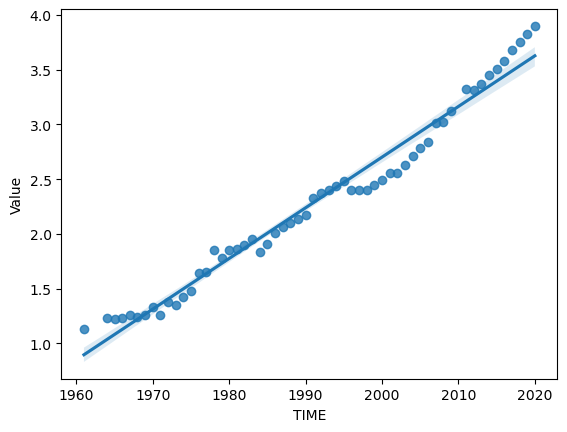

In [204]:
sns.regplot('TIME', 'Value', data=AUSNEW)

In [212]:
AUSNEW.corr() #상관관계 분석

,TIME,Value
TIME,1.000000,0.987007
Value,0.987007,1.000000


In [213]:
stats.pearsonr(AUSNEW['TIME'], AUSNEW['Value'])

PearsonRResult(statistic=0.9870070477188734, pvalue=2.3052191193503962e-45)

#### 매 년도 별 인구 1000명 당 의사 수

In [241]:
#각 년도 별 국가의 의사 평균 인구 수
df = cov_doc2.groupby('TIME')['Value'].mean()

In [247]:
df.index
df.values

array([1.181     , 1.2025    , 1.24545455, 1.27      , 1.2825    ,
       1.3025    , 1.32583333, 1.34833333, 1.3625    , 1.385     ,
       1.44846154, 1.50076923, 1.54923077, 1.58307692, 1.62846154,
       1.68230769, 1.72384615, 1.76538462, 1.75428571, 1.89153846,
       1.85117647, 1.86133333, 1.93      , 2.03642857, 2.028     ,
       2.11722222, 2.21470588, 2.3175    , 2.304375  , 2.41066667,
       2.26545455, 2.42666667, 2.4573913 , 2.40291667, 2.51333333,
       2.52615385, 2.57310345, 2.64857143, 2.62      , 2.626     ,
       2.62424242, 2.6696875 , 2.68545455, 2.70205882, 2.75      ,
       2.86411765, 2.89571429, 2.84805556, 2.87513514, 2.85135135,
       2.85378378, 2.97108108, 2.91384615, 2.97526316, 3.06027778,
       3.03111111, 3.13944444, 3.13444444, 3.21444444, 3.28571429,
       3.40655172, 3.93083333])

PearsonRResult(statistic=0.9881996695764457, pvalue=1.338650141876947e-50)

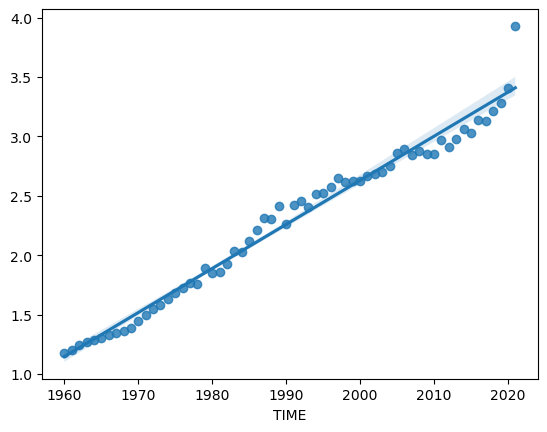

In [251]:
sns.regplot(df.index, df.values, data=df)
stats.pearsonr(df.index, df.values)

In [258]:
cov_doc[cov_doc['TIME']==2021]['LOCATION']

6     AUT
13    CAN
26    DEU
30    HUN
34    ISL
38    IRL
42    ITA
54    NZL
58    NOR
71    CHE
78    GBR
84    BRA
Name: LOCATION, dtype: object

### 결론  :
#### 1. 시간이 지날 수록 인구 1000명당 의사 수가 증가가 뚜렷하게 일어난다.
#### 2. 상관 분석 결과 PearsonR 값이 1에 가까움으로, 년도와 1000명당 의사 수가 매우 강한 연관성을 가지고 있다.
#### 3. 2020년도와 2022년도 사이에 보건인구수는 일정하게 증가할 것으로 예상된다.
#### 4. 2021년도에 갑작스럽게 수치가 증가한 이유는, 2021년 데이터의 경우 12개 국가만 가져오는데, 이때 대부분의 국가가 선진국이기 때문이다.

In [265]:
cov2020=cov_doc[cov_doc['TIME']==2020]

In [268]:
newCov2020 = cov2020.merge(cov_g,left_on='LOCATION',right_on='iso_code')

In [275]:
newCov2020

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,iso_code,continent,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AUS,MEDICALDOC,TOT,1000HAB,A,2020,3.90,E,AUS,Oceania,...,16.5,NaN,3.84,83.44,0.944,26177410.0,-47.0,-0.4,2.8,-1.830927
1,AUS,MEDICALDOC,TOT,1000HAB,A,2020,3.90,E,AUS,Oceania,...,16.5,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN,NaN,NaN
2,AUS,MEDICALDOC,TOT,1000HAB,A,2020,3.90,E,AUS,Oceania,...,16.5,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN,NaN,NaN
3,AUS,MEDICALDOC,TOT,1000HAB,A,2020,3.90,E,AUS,Oceania,...,16.5,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN,NaN,NaN
4,AUS,MEDICALDOC,TOT,1000HAB,A,2020,3.90,E,AUS,Oceania,...,16.5,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31664,LTU,MEDICALDOC,TOT,1000HAB,A,2020,4.48,NaN,LTU,Europe,...,38.0,NaN,6.56,75.93,0.882,2750058.0,NaN,NaN,NaN,NaN
31665,LTU,MEDICALDOC,TOT,1000HAB,A,2020,4.48,NaN,LTU,Europe,...,38.0,NaN,6.56,75.93,0.882,2750058.0,NaN,NaN,NaN,NaN
31666,LTU,MEDICALDOC,TOT,1000HAB,A,2020,4.48,NaN,LTU,Europe,...,38.0,NaN,6.56,75.93,0.882,2750058.0,NaN,NaN,NaN,NaN
31667,LTU,MEDICALDOC,TOT,1000HAB,A,2020,4.48,NaN,LTU,Europe,...,38.0,NaN,6.56,75.93,0.882,2750058.0,NaN,NaN,NaN,NaN


In [276]:
cov_g

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256076,ZWE,Africa,Zimbabwe,2023-02-04,262324.0,0.0,102.571,5658.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
256077,ZWE,Africa,Zimbabwe,2023-02-05,262324.0,0.0,102.571,5658.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
256078,ZWE,Africa,Zimbabwe,2023-02-06,262324.0,0.0,102.571,5658.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
256079,ZWE,Africa,Zimbabwe,2023-02-07,262324.0,0.0,102.571,5658.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [519]:
# LOCATION 국가, TIME 년도, total_deaths 총 사망자 수, total_deaths_per_million 백만명당 사망자수, 
# date 날짜, total_tests 총 검사자 수, total_tests_per_thousand 천명당 총 검사자 수, gdp_per_capita 국내총생산량(GDP), 
# extreme_poverty 극빈층 비율, hospital_beds_per_thousand 천명당 병상 수, human_development_index 인간개발지수, total_vaccinations 총 백신투여 횟수 수
# total_vaccinations_per_hundred 총 인구 100명당 코로나19 백신 접종 총 투여 횟수, people_vaccinated 1회 이상 백신을 투여받은 사람들 수
# people_fully_vaccinated_per_hundred 백명당 모든 백신 접종과절을 맞은 사람들
X=newCov2020[(['LOCATION','TIME','Value','total_cases_per_million','total_deaths','total_deaths_per_million','date','total_tests','total_tests_per_thousand',
               'aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','hospital_beds_per_thousand','human_development_index',
               'total_vaccinations','total_vaccinations_per_hundred','people_vaccinated','people_fully_vaccinated_per_hundred'])]
Y=X[X['date']=='2022-02-08']

In [520]:
X[X['LOCATION']=='DEU'][X[X['LOCATION']=='DEU']['total_tests'].notnull()].tail(1)

,LOCATION,TIME,Value,total_cases_per_million,total_deaths,total_deaths_per_million,date,total_tests,total_tests_per_thousand,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,human_development_index,total_vaccinations,total_vaccinations_per_hundred,people_vaccinated,people_fully_vaccinated_per_hundred
7458,DEU,2020,4.47,320721.858,139729.0,1676.014,2022-06-12,131286804.0,1574.021,21.453,15.957,45229.245,NaN,8.0,0.947,182357861.0,218.73,64720659.0,76.0


In [521]:
#index 새로 주기
Y1=Y.reset_index(inplace=False)

In [522]:
# china 제거
Y1.drop([22],axis=0,inplace=True)

In [523]:
#TIME,index,date 필요 없는 컬럼 제거
Y1.drop(['index','date','TIME'],axis=1,inplace=True)

In [524]:
Y1.isnull().sum() #NaN 값 확인

LOCATION                               0
Value                                  0
total_cases_per_million                0
total_deaths                           0
total_deaths_per_million               0
total_tests                            2
total_tests_per_thousand               2
aged_65_older                          0
aged_70_older                          0
gdp_per_capita                         0
extreme_poverty                        7
hospital_beds_per_thousand             0
human_development_index                0
total_vaccinations                     2
total_vaccinations_per_hundred         2
people_vaccinated                      1
people_fully_vaccinated_per_hundred    2
dtype: int64

In [525]:
# 극빈층의 비율은 전체 극빈층의 비율로 NaN값을 채움
Y1['extreme_poverty'].fillna(Y1['extreme_poverty'].mean(),inplace=True)

In [526]:
# 아래 두 나라는 코로나에서 완전 해방됨을 선언함에 따라 total_test 계측이 선언 이후 이뤄지지 않음 그러므로
# DEU의 total_test 마지막 값을 찾아서 NaN 값을 채움
# NZL의 total_test 마지막 값을 찾아서 NaN 값을 채움
DEU_tt=X[X['LOCATION']=='DEU'][X[X['LOCATION']=='DEU']['total_tests'].notnull()].tail(1)
NZL_tt=X[X['LOCATION']=='NZL'][X[X['LOCATION']=='NZL']['total_tests'].notnull()].tail(1)

In [527]:
DEU_tt['total_tests'].values

array([1.31286804e+08])

In [528]:
Y1.groupby('LOCATION').get_group('DEU')['total_test']=DEU_tt['total_tests'].values

C:\Users\48\AppData\Local\Temp\ipykernel_13608\1754340472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y1.groupby('LOCATION').get_group('DEU')['total_test']=DEU_tt['total_tests'].values


In [529]:
Y1

,LOCATION,Value,total_cases_per_million,total_deaths,total_deaths_per_million,total_tests,total_tests_per_thousand,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,human_development_index,total_vaccinations,total_vaccinations_per_hundred,people_vaccinated,people_fully_vaccinated_per_hundred
0,AUS,3.90,107397.561,4373.0,167.052,61854639.0,2386.267,15.504,10.129,44648.710,0.500000,3.84,0.944,51533463.0,196.86,21849002.0,77.60
1,AUT,5.35,234127.704,17358.0,1941.694,147852372.0,16571.510,19.202,13.748,45436.686,0.700000,7.37,0.922,17989469.0,201.23,6839820.0,NaN
2,BEL,3.21,288599.195,29429.0,2524.811,30897125.0,2660.926,18.571,12.849,42658.576,0.200000,5.64,0.931,24455846.0,209.81,9195124.0,76.77
3,CAN,2.77,82313.986,34969.0,909.364,57137952.0,1497.522,16.984,10.797,44017.591,0.500000,2.50,0.929,79317565.0,206.26,32411426.0,79.19
4,CZE,4.10,325420.836,37549.0,3578.143,51536579.0,4903.226,19.027,11.580,32605.906,1.014286,6.63,0.900,17217773.0,164.07,6936890.0,64.93
5,FRA,3.36,311025.747,133681.0,1971.318,240603247.0,3568.616,19.718,13.079,38605.671,1.014286,5.98,0.901,138988248.0,204.96,54217663.0,76.74
6,DEU,4.47,135389.824,118943.0,1426.691,NaN,NaN,21.453,15.957,45229.245,1.014286,8.00,0.947,171092262.0,205.22,64185658.0,74.36
7,HUN,3.14,166305.252,42069.0,4220.700,9882012.0,1017.737,18.577,11.976,26777.561,0.500000,7.02,0.854,NaN,NaN,6375808.0,61.45
8,ISL,4.32,213221.669,50.0,134.083,1075601.0,2904.400,14.431,9.207,46482.958,0.200000,2.91,0.949,795015.0,213.20,308919.0,76.76
9,IRL,3.46,243845.444,6228.0,1239.870,11088197.0,2223.632,13.928,8.678,67335.293,0.200000,2.96,0.955,10528499.0,209.60,4058446.0,78.65


In [530]:
Y1.loc[6,'total_tests']=DEU_tt['total_tests'].values
Y1.loc[6,'total_tests_per_thousand']=DEU_tt['total_tests_per_thousand'].values
Y1.loc[14,'total_tests']=NZL_tt['total_tests'].values
Y1.loc[14,'total_tests_per_thousand']=NZL_tt['total_tests_per_thousand'].values

In [531]:
Y1.isnull().sum()

LOCATION                               0
Value                                  0
total_cases_per_million                0
total_deaths                           0
total_deaths_per_million               0
total_tests                            0
total_tests_per_thousand               0
aged_65_older                          0
aged_70_older                          0
gdp_per_capita                         0
extreme_poverty                        0
hospital_beds_per_thousand             0
human_development_index                0
total_vaccinations                     2
total_vaccinations_per_hundred         2
people_vaccinated                      1
people_fully_vaccinated_per_hundred    2
dtype: int64

In [532]:
#헝가리와 슬로베키아의 백신, 가장 최신 값으로 넣어줌
HUN_tt = X[X['LOCATION']=='HUN'][X[X['LOCATION']=='HUN']['total_vaccinations'].notnull()].tail(1)
SVK_tv = X[X['LOCATION']=='SVK'][X[X['LOCATION']=='SVK']['total_vaccinations'].notnull()].tail(1)

In [533]:
Y1.loc[7,'total_vaccinations']=HUN_tt['total_vaccinations'].values
Y1.loc[7,'total_vaccinations_per_hundred']=HUN_tt['total_vaccinations_per_hundred'].values

In [534]:
Y1.loc[16,'total_vaccinations']=SVK_tv['total_vaccinations'].values
Y1.loc[16,'total_vaccinations_per_hundred']=SVK_tv['total_vaccinations_per_hundred'].values
Y1.loc[16,'people_vaccinated']=SVK_tv['people_vaccinated'].values
Y1.loc[16,'people_fully_vaccinated_per_hundred']=SVK_tv['people_fully_vaccinated_per_hundred'].values
# Y1.loc[16,'people_fully_vaccinated_per_hundred']=Y1['people_fully_vaccinated_per_hundred'].mean()

In [535]:
#호주의 people_fully_vaccinated_per_hundred을 가장 최신 값으로 넣어줌
AUT_tv = X[X['LOCATION']=='AUT'][X[X['LOCATION']=='AUT']['people_fully_vaccinated_per_hundred'].notnull()].tail(1)

In [536]:
Y1.loc[1,'people_fully_vaccinated_per_hundred']=AUT_tv['people_fully_vaccinated_per_hundred'].values

In [537]:
Y1

,LOCATION,Value,total_cases_per_million,total_deaths,total_deaths_per_million,total_tests,total_tests_per_thousand,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,human_development_index,total_vaccinations,total_vaccinations_per_hundred,people_vaccinated,people_fully_vaccinated_per_hundred
0,AUS,3.90,107397.561,4373.0,167.052,61854639.0,2386.267,15.504,10.129,44648.710,0.500000,3.84,0.944,51533463.0,196.86,21849002.0,77.60
1,AUT,5.35,234127.704,17358.0,1941.694,147852372.0,16571.510,19.202,13.748,45436.686,0.700000,7.37,0.922,17989469.0,201.23,6839820.0,76.32
2,BEL,3.21,288599.195,29429.0,2524.811,30897125.0,2660.926,18.571,12.849,42658.576,0.200000,5.64,0.931,24455846.0,209.81,9195124.0,76.77
3,CAN,2.77,82313.986,34969.0,909.364,57137952.0,1497.522,16.984,10.797,44017.591,0.500000,2.50,0.929,79317565.0,206.26,32411426.0,79.19
4,CZE,4.10,325420.836,37549.0,3578.143,51536579.0,4903.226,19.027,11.580,32605.906,1.014286,6.63,0.900,17217773.0,164.07,6936890.0,64.93
5,FRA,3.36,311025.747,133681.0,1971.318,240603247.0,3568.616,19.718,13.079,38605.671,1.014286,5.98,0.901,138988248.0,204.96,54217663.0,76.74
6,DEU,4.47,135389.824,118943.0,1426.691,131286804.0,1574.021,21.453,15.957,45229.245,1.014286,8.00,0.947,171092262.0,205.22,64185658.0,74.36
7,HUN,3.14,166305.252,42069.0,4220.700,9882012.0,1017.737,18.577,11.976,26777.561,0.500000,7.02,0.854,16701238.0,167.56,6375808.0,61.45
8,ISL,4.32,213221.669,50.0,134.083,1075601.0,2904.400,14.431,9.207,46482.958,0.200000,2.91,0.949,795015.0,213.20,308919.0,76.76
9,IRL,3.46,243845.444,6228.0,1239.870,11088197.0,2223.632,13.928,8.678,67335.293,0.200000,2.96,0.955,10528499.0,209.60,4058446.0,78.65


#### LOCATION 국가, TIME 년도, total_deaths 총 사망자 수, total_deaths_per_million 백만명당 사망자수, 
#### date 날짜, total_tests 총 검사자 수, total_tests_per_thousand 천명당 총 검사자 수, gdp_per_capita 국내총생산량(GDP), 
#### extreme_poverty 극빈층 비율, hospital_beds_per_thousand 천명당 병상 수, human_development_index 길고 건강한 삶, 지식 및 적절한 생활 수준, total_vaccinations 총 백신투여 횟수 수
#### total_vaccinations_per_hundred 총 인구 100명당 코로나19 백신 접종 총 투여 횟수, people_vaccinated 1회 이상 백신을 투여받은 사람들 수
#### people_fully_vaccinated_per_hundred 백명당 모든 백신 접종과절을 맞은 사람들

새로운 가설 세우기
1. value 값과 total_deaths_per_million 의 상관관계 (수치,수치)
1-2. gdp_per_capita 와 value (1번 가설이 맞다면)
2. hospital_beds_per_thousand 와 total_deaths_per_million (수치,수치)
3. extreme_poverty 와 total_deaths_per_million
4. extreme_poverty 와 total_tests
5. extreme_poverty 와 people_fully_vaccinated_per_hundred
6. total_tests_per_thousand 와 gdp_per_capita
7. gdp_per_capita 와 hospital_beds_per_thousand
8. human_development_index 와 value

9. extreme_poverty 와 human_development_index

10. total_cases_per_million 와 total_deaths_per_million

수치 수치 아닌 것 찾기


C:\Users\48\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


PearsonRResult(statistic=0.08018202950392886, pvalue=0.6850412698969984)

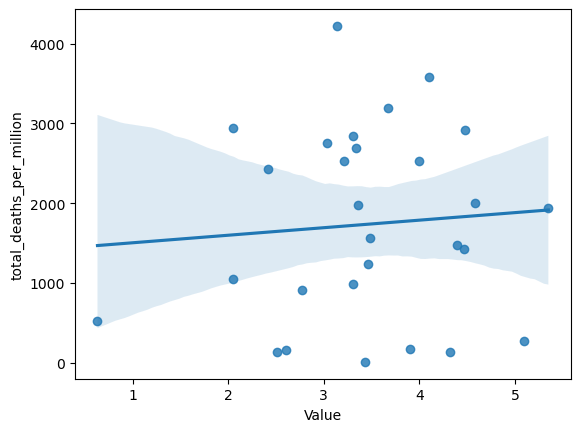

In [538]:
#1 value 값과 total_deaths_per_million 의 상관관계 (수치,수치)
sns.regplot(Y1['Value'], Y1['total_deaths_per_million'], data=Y1)
stats.pearsonr(Y1['Value'], Y1['total_deaths_per_million'])

#### 결론 : 1000명당 의사 수와는 코로나 100만명 당 총 사망자 수와 관계는 없다.

PearsonRResult(statistic=0.6226380998693901, pvalue=0.00040260364433784693)

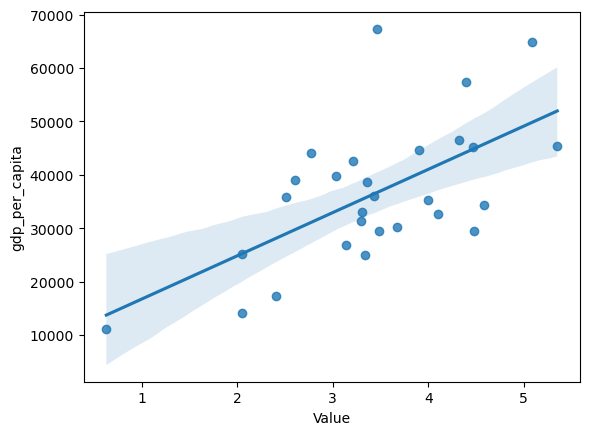

In [539]:
#2 value 값과 gdp_per_capita의 상관 관계 (수치,수치)
sns.regplot(Y1['Value'], Y1['gdp_per_capita'], data=Y1)
stats.pearsonr(Y1['Value'], Y1['gdp_per_capita'])

#### 결론 : GDP와 1000명당 의사 수는 관계가 크다.

PearsonRResult(statistic=-0.01034999775989865, pvalue=0.9583124813375299)

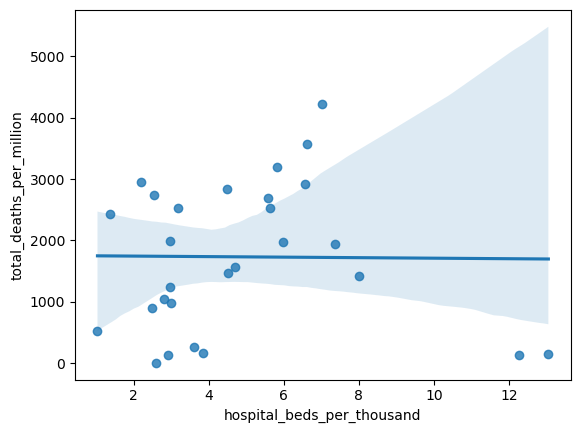

In [540]:
#3 hospital_beds_per_thousand 값과 total_deaths_per_million 의 상관관계 (수치,수치)
sns.regplot(Y1['hospital_beds_per_thousand'], Y1['total_deaths_per_million'], data=Y1)
stats.pearsonr(Y1['hospital_beds_per_thousand'], Y1['total_deaths_per_million'])

#### 결론 : 극빈층 비율과와 코로나로 인한 사망자 비율은 관계가 없다.

PearsonRResult(statistic=0.041449327127748056, pvalue=0.8341209831803311)

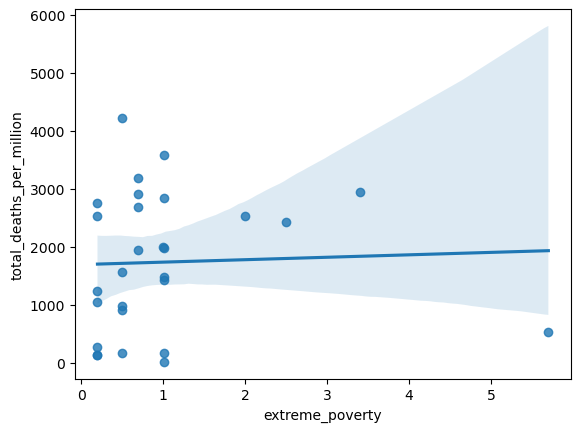

In [541]:
#4 extreme_poverty 값과 total_deaths_per_million 의 상관관계 (수치,수치)
sns.regplot(Y1['extreme_poverty'], Y1['total_deaths_per_million'], data=Y1)
stats.pearsonr(Y1['extreme_poverty'], Y1['total_deaths_per_million'])

#### 결론 : 극빈층 비율과와 코로나로 인한 사망자 비율은 관계가 없다.

PearsonRResult(statistic=-0.0415096688208644, pvalue=0.833882808865585)

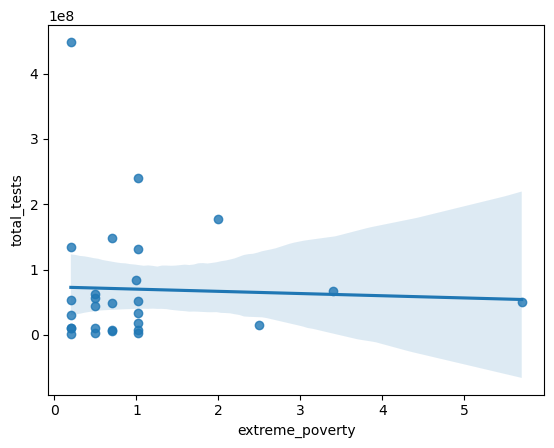

In [542]:
#4. extreme_poverty 와 total_tests
sns.regplot(Y1['extreme_poverty'], Y1['total_tests'], data=Y1)
stats.pearsonr(Y1['extreme_poverty'], Y1['total_tests'])

#### 결론 : 극빈층 비율과와 코로나로 검사자 수는 상관이 없다.

PearsonRResult(statistic=-0.41032868413603707, pvalue=0.030098088982987346)

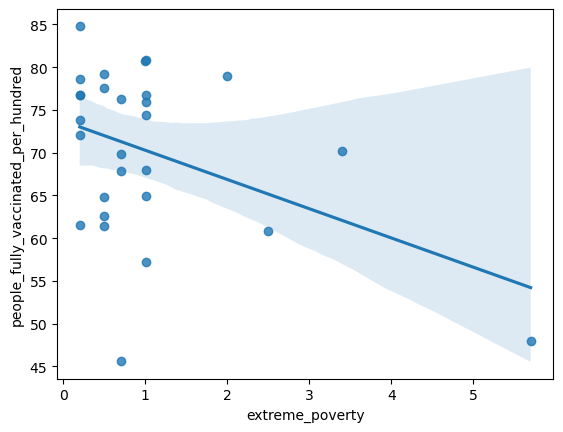

In [543]:
#5. extreme_poverty 와 people_fully_vaccinated_per_hundred
# 슬로바키아 SVK의 경우 22.07월의 people_fully_vaccinated_per_hundred이 45%로 이상값이 나온다. 
# 이 값을 전체 평균으로 바꾸어 처리한 결과 더 좋은 그래프가 나온다.
sns.regplot(Y1['extreme_poverty'], Y1['people_fully_vaccinated_per_hundred'], data=Y1)
stats.pearsonr(Y1['extreme_poverty'], Y1['people_fully_vaccinated_per_hundred'])

In [544]:
X[X['LOCATION']=='SVK'][X[X['LOCATION']=='SVK']['total_vaccinations'].notnull()].tail(1)

,LOCATION,TIME,Value,total_cases_per_million,total_deaths,total_deaths_per_million,date,total_tests,total_tests_per_thousand,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,human_development_index,total_vaccinations,total_vaccinations_per_hundred,people_vaccinated,people_fully_vaccinated_per_hundred
18428,SVK,2020,3.67,457352.278,20223.0,3583.443,2022-07-31,NaN,NaN,15.07,9.167,30155.152,0.7,5.82,0.86,5754313.0,101.96,2595901.0,45.68


In [545]:
Y1.loc[16,'people_fully_vaccinated_per_hundred']=Y1['people_fully_vaccinated_per_hundred'].mean()

C:\Users\48\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


PearsonRResult(statistic=-0.4999049746413229, pvalue=0.006753034404892058)

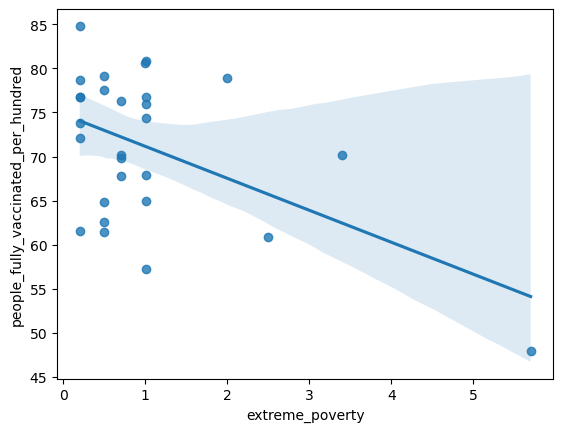

In [546]:
#5. extreme_poverty 와 people_fully_vaccinated_per_hundred
# 슬로바키아 SVK의 경우 22.07월의 people_fully_vaccinated_per_hundred이 45%로 이상값이 나온다. 
# 이 값을 전체 평균으로 바꾸어 처리한 결과 더 좋은 그래프가 나온다.
sns.regplot(Y1['extreme_poverty'], Y1['people_fully_vaccinated_per_hundred'], data=Y1)
stats.pearsonr(Y1['extreme_poverty'], Y1['people_fully_vaccinated_per_hundred'])

#### 결론 : 극빈층 비율과 코로나 백신 맞는 비율은 약간의 상관 관계를 가진다.

PearsonRResult(statistic=-0.4999049746413229, pvalue=0.006753034404892058)

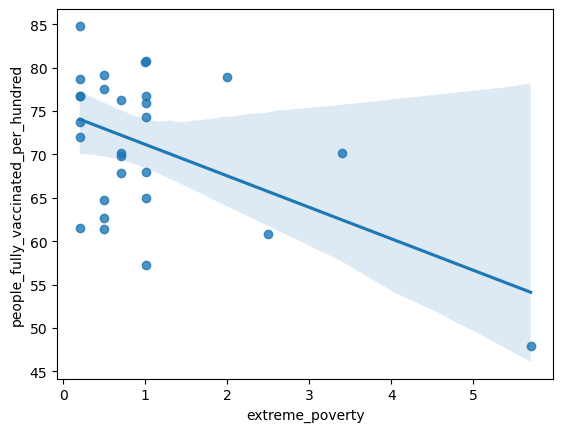

In [547]:
#5-1. extreme_poverty 와 people_fully_vaccinated_per_hundred
sns.regplot(Y1['extreme_poverty'], Y1['people_fully_vaccinated_per_hundred'], data=Y1)
stats.pearsonr(Y1['extreme_poverty'], Y1['people_fully_vaccinated_per_hundred'])

#### 결론 : 극빈층 비율과 코로나 백신 여러번 맞는 비율은 약간의 상관 관계를 가진다.

PearsonRResult(statistic=0.17617233111766534, pvalue=0.3698485229517141)

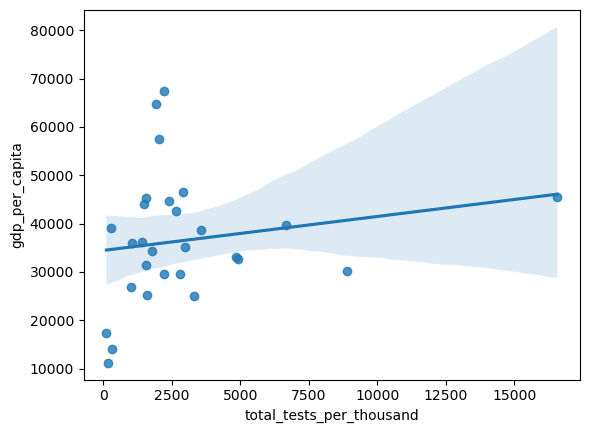

In [548]:
#6. total_tests_per_thousand 와 gdp_per_capita
sns.regplot(Y1['total_tests_per_thousand'], Y1['gdp_per_capita'], data=Y1)
stats.pearsonr(Y1['total_tests_per_thousand'], Y1['gdp_per_capita'])

PearsonRResult(statistic=0.12433237499686198, pvalue=0.5284569861690985)

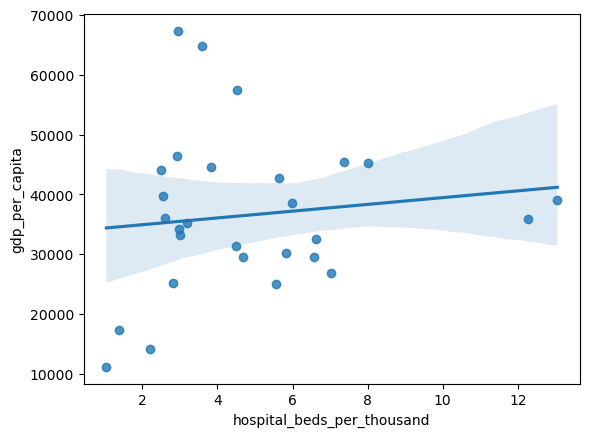

In [549]:
#7. gdp_per_capita 와 hospital_beds_per_thousand
sns.regplot(Y1['hospital_beds_per_thousand'], Y1['gdp_per_capita'], data=Y1)
stats.pearsonr(Y1['hospital_beds_per_thousand'], Y1['gdp_per_capita'])

PearsonRResult(statistic=0.696499109682337, pvalue=3.840754739060072e-05)

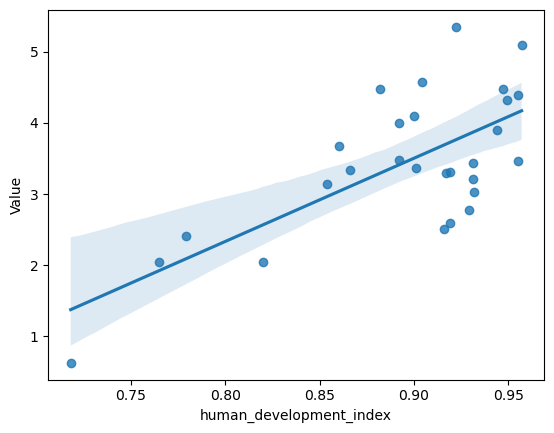

In [550]:
#8. human_development_index 와 value
sns.regplot(Y1['human_development_index'], Y1['Value'], data=Y1)
stats.pearsonr(Y1['human_development_index'], Y1['Value'])

#### 결론 : 웰빙지수(길고 건강한 삶, 지식 및 적절한 생활 수준)는 인구수당 의사수랑 관계가 크다

PearsonRResult(statistic=-0.7792557878170673, pvalue=1.0297061078981102e-06)

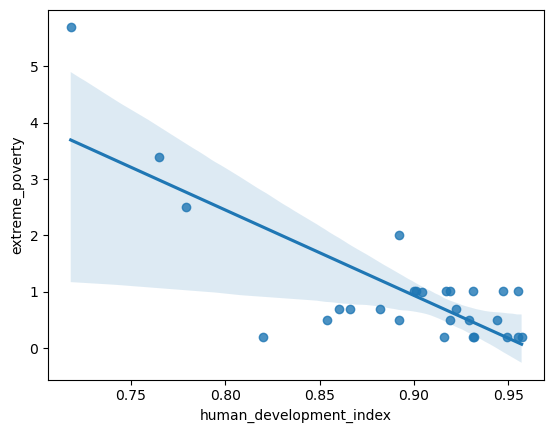

In [551]:
#9. extreme_poverty 와 human_development_index
sns.regplot(Y1['human_development_index'], Y1['extreme_poverty'], data=Y1)
stats.pearsonr(Y1['human_development_index'], Y1['extreme_poverty'])

#### 결론 : 웰빙지수(길고 건강한 삶, 지식 및 적절한 생활 수준)는 극빈충 비율과 관계가 크며 역방향이다

PearsonRResult(statistic=0.5313207324170326, pvalue=0.0036210457253472326)

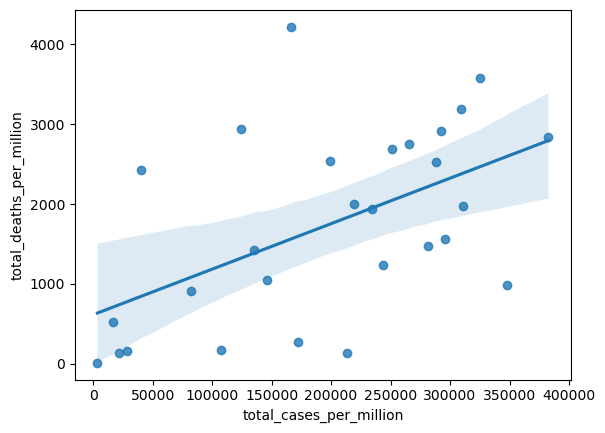

In [552]:
#10. total_cases_per_million 와 total_deaths_per_million
sns.regplot(Y1['total_cases_per_million'], Y1['total_deaths_per_million'], data=Y1)
stats.pearsonr(Y1['total_cases_per_million'], Y1['total_deaths_per_million'])

#### 결론 : 코로나 검사 수와 사망자 수와 관계가 있다.

#### 2, 나이와 인종 성에 따른 코로나 데이터 by 미국인

In [577]:
cov_group=pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/totals/group-data-by-boro.csv')
cov_group

,group,subgroup,BK_CONFIRMED_CASE_COUNT,BK_PROBABLE_CASE_COUNT,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CONFIRMED_CASE_RATE,BK_CASE_RATE,BK_HOSPITALIZED_RATE,...,QN_DEATH_RATE,SI_CONFIRMED_CASE_COUNT,SI_PROBABLE_CASE_COUNT,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CONFIRMED_CASE_RATE,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,812777.0,144127.0,956904.0,62055.0,14169.0,31750.30,37380.48,2424.12,...,593.47,190078.0,35539.0,225617.0,12310.0,2693.0,39920.36,47384.29,2585.36,565.59
1,Age,0-4,32526.0,5833.0,38359.0,1300.0,NaN,17780.96,20969.68,710.67,...,NaN,6462.0,1292.0,7754.0,153.0,NaN,23623.60,28346.86,559.33,NaN
2,Age,5-12,63842.0,11384.0,75226.0,663.0,NaN,25336.60,29854.50,263.12,...,NaN,14826.0,2814.0,17640.0,70.0,NaN,32403.06,38553.22,152.99,NaN
3,Age,13-17,38452.0,7723.0,46175.0,558.0,NaN,27434.01,32944.07,398.11,...,NaN,10360.0,2186.0,12546.0,97.0,NaN,34688.27,42007.63,324.78,NaN
4,Age,0-17,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,...,2.23,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.88
5,Age,18-24,74064.0,15069.0,89133.0,1960.0,26.0,35637.20,42887.91,943.09,...,11.62,18234.0,3874.0,22108.0,294.0,8.0,45961.82,55726.88,741.08,20.17
6,Age,25-34,170419.0,33730.0,204149.0,5011.0,128.0,36256.20,43432.17,1066.08,...,33.36,32008.0,6035.0,38043.0,662.0,15.0,49456.88,58781.81,1022.88,23.18
7,Age,35-44,131271.0,23385.0,154656.0,5040.0,298.0,36669.31,43201.69,1407.88,...,105.49,28832.0,5076.0,33908.0,894.0,51.0,48724.10,57302.19,1510.80,86.19
8,Age,45-54,102531.0,17153.0,119684.0,6215.0,820.0,34713.20,40520.57,2104.17,...,258.69,28364.0,4980.0,33344.0,1404.0,144.0,44199.96,51960.36,2187.87,224.40
9,Age,55-64,91813.0,14486.0,106299.0,10145.0,1936.0,32132.22,37201.95,3550.49,...,681.94,25790.0,4643.0,30433.0,2189.0,300.0,38998.94,46019.96,3310.15,453.65


In [610]:
for i in range(4):
    cov_group.iloc[4,i+2] = cov_group.iloc[1:4,:].iloc[:,i+2].sum()
for i in range(3):
    cov_group.iloc[4,i+7] = cov_group.iloc[1:4,:].iloc[:,i+7].sum()
for i in range(4):
    cov_group.iloc[4,i+11] = cov_group.iloc[1:4,:].iloc[:,i+11].sum()
for i in range(3):
    cov_group.iloc[4,i+16] = cov_group.iloc[1:4,:].iloc[:,i+16].sum()
for i in range(4):
    cov_group.iloc[4,i+20] = cov_group.iloc[1:4,:].iloc[:,i+20].sum()
for i in range(3):
    cov_group.iloc[4,i+25] = cov_group.iloc[1:4,:].iloc[:,i+25].sum()
for i in range(4):
    cov_group.iloc[4,i+29] = cov_group.iloc[1:4,:].iloc[:,i+29].sum()
for i in range(3):
    cov_group.iloc[4,i+34] = cov_group.iloc[1:4,:].iloc[:,i+34].sum()
for i in range(4):
    cov_group.iloc[4,i+38] = cov_group.iloc[1:4,:].iloc[:,i+38].sum()
for i in range(3):
    cov_group.iloc[4,i+43] = cov_group.iloc[1:4,:].iloc[:,i+43].sum()

In [597]:
cov_group.columns.shape

(47,)

,group,subgroup,BK_CONFIRMED_CASE_COUNT,BK_PROBABLE_CASE_COUNT,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CONFIRMED_CASE_RATE,BK_CASE_RATE,BK_HOSPITALIZED_RATE,...,QN_DEATH_RATE,SI_CONFIRMED_CASE_COUNT,SI_PROBABLE_CASE_COUNT,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CONFIRMED_CASE_RATE,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
1,Age,0-4,32526.0,5833.0,38359.0,1300.0,NaN,17780.96,20969.68,710.67,...,NaN,6462.0,1292.0,7754.0,153.0,NaN,23623.60,28346.86,559.33,NaN
2,Age,5-12,63842.0,11384.0,75226.0,663.0,NaN,25336.60,29854.50,263.12,...,NaN,14826.0,2814.0,17640.0,70.0,NaN,32403.06,38553.22,152.99,NaN
3,Age,13-17,38452.0,7723.0,46175.0,558.0,NaN,27434.01,32944.07,398.11,...,NaN,10360.0,2186.0,12546.0,97.0,NaN,34688.27,42007.63,324.78,NaN


In [635]:
cov_group=cov_group.drop([1,2,3],axis=0)

In [617]:
cov_group.iloc[4,:].isnull().sum()

0

In [636]:
cov_group

,group,subgroup,BK_CONFIRMED_CASE_COUNT,BK_PROBABLE_CASE_COUNT,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CONFIRMED_CASE_RATE,BK_CASE_RATE,BK_HOSPITALIZED_RATE,...,QN_DEATH_RATE,SI_CONFIRMED_CASE_COUNT,SI_PROBABLE_CASE_COUNT,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CONFIRMED_CASE_RATE,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,812777.0,144127.0,956904.0,62055.0,14169.0,31750.30,37380.48,2424.12,...,593.47,190078.0,35539.0,225617.0,12310.0,2693.0,39920.36,47384.29,2585.36,565.59
4,Age,0-17,134820.0,24940.0,159760.0,2521.0,18.0,70551.57,83768.25,1371.90,...,2.23,31648.0,6292.0,37940.0,320.0,4.0,90714.93,108907.71,1037.10,3.88
5,Age,18-24,74064.0,15069.0,89133.0,1960.0,26.0,35637.20,42887.91,943.09,...,11.62,18234.0,3874.0,22108.0,294.0,8.0,45961.82,55726.88,741.08,20.17
6,Age,25-34,170419.0,33730.0,204149.0,5011.0,128.0,36256.20,43432.17,1066.08,...,33.36,32008.0,6035.0,38043.0,662.0,15.0,49456.88,58781.81,1022.88,23.18
7,Age,35-44,131271.0,23385.0,154656.0,5040.0,298.0,36669.31,43201.69,1407.88,...,105.49,28832.0,5076.0,33908.0,894.0,51.0,48724.10,57302.19,1510.80,86.19
8,Age,45-54,102531.0,17153.0,119684.0,6215.0,820.0,34713.20,40520.57,2104.17,...,258.69,28364.0,4980.0,33344.0,1404.0,144.0,44199.96,51960.36,2187.87,224.40
9,Age,55-64,91813.0,14486.0,106299.0,10145.0,1936.0,32132.22,37201.95,3550.49,...,681.94,25790.0,4643.0,30433.0,2189.0,300.0,38998.94,46019.96,3310.15,453.65
10,Age,65-74,61662.0,9120.0,70782.0,12301.0,3327.0,29328.92,33666.76,5850.85,...,1486.44,14689.0,2795.0,17484.0,2591.0,607.0,31481.60,37471.87,5553.06,1300.93
11,Age,75+,45776.0,6064.0,51840.0,18858.0,7616.0,29038.13,32884.85,11962.62,...,4356.39,10478.0,1812.0,12290.0,3956.0,1564.0,32099.75,37650.88,12119.36,4791.37
12,Race/ethnicity,Asian/Pacific-Islander,82660.0,12595.0,95255.0,4129.0,972.0,25699.14,29613.53,1281.16,...,328.28,14429.0,2619.0,17048.0,600.0,153.0,28395.39,33571.07,1095.28,295.03


In [707]:
#필요한 데이터만 가져옴
XX=cov_group[(['group','subgroup','BK_CONFIRMED_CASE_RATE','BX_CONFIRMED_CASE_RATE',
               'MN_CONFIRMED_CASE_RATE','QN_CONFIRMED_CASE_RATE','SI_CONFIRMED_CASE_RATE',
               'BK_HOSPITALIZED_RATE','BX_HOSPITALIZED_RATE','MN_HOSPITALIZED_RATE','QN_HOSPITALIZED_RATE','SI_HOSPITALIZED_RATE',
               'BK_DEATH_RATE','BX_DEATH_RATE','MN_DEATH_RATE','QN_DEATH_RATE','SI_DEATH_RATE'])]
XX

,group,subgroup,BK_CONFIRMED_CASE_RATE,BX_CONFIRMED_CASE_RATE,MN_CONFIRMED_CASE_RATE,QN_CONFIRMED_CASE_RATE,SI_CONFIRMED_CASE_RATE,BK_HOSPITALIZED_RATE,BX_HOSPITALIZED_RATE,MN_HOSPITALIZED_RATE,QN_HOSPITALIZED_RATE,SI_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_DEATH_RATE,MN_DEATH_RATE,QN_DEATH_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,31750.30,31401.90,30340.41,33393.72,39920.36,2424.12,3085.09,1897.52,2508.32,2585.36,553.50,600.26,377.23,593.47,565.59
4,Age,0-17,70551.57,68664.58,73223.40,75091.60,90714.93,1371.90,1820.43,1274.91,1083.66,1037.10,3.13,2.31,2.59,2.23,3.88
5,Age,18-24,35637.20,29631.08,40473.95,37832.90,45961.82,943.09,1186.28,515.62,795.69,741.08,12.51,9.33,5.49,11.62,20.17
6,Age,25-34,36256.20,34935.33,34617.92,39343.91,49456.88,1066.08,1720.01,630.87,1226.66,1022.88,27.23,43.98,14.09,33.36,23.18
7,Age,35-44,36669.31,38833.52,32119.05,40193.01,48724.10,1407.88,2302.20,1016.84,1607.15,1510.80,83.24,142.15,43.56,105.49,86.19
8,Age,45-54,34713.20,36096.45,29808.83,36804.69,44199.96,2104.17,3095.56,1497.57,2148.05,2187.87,277.62,356.23,132.94,258.69,224.40
9,Age,55-64,32132.22,35482.20,28967.89,33181.24,38998.94,3550.49,5037.68,2717.06,3443.63,3310.15,677.55,884.73,365.10,681.94,453.65
10,Age,65-74,29328.92,30096.56,24037.75,28196.21,31481.60,5850.85,7845.05,3844.99,5323.29,5553.06,1582.45,1992.30,808.38,1486.44,1300.93
11,Age,75+,29038.13,26895.30,24571.41,26229.95,32099.75,11962.62,12239.63,8549.80,10260.26,12119.36,4831.23,4750.01,3026.58,4356.39,4791.37
12,Race/ethnicity,Asian/Pacific-Islander,25699.14,26414.54,24569.25,26154.85,28395.39,1281.16,2086.60,929.10,1440.12,1095.28,323.97,375.52,230.22,328.28,295.03


In [712]:
#지역대별로 묶어 주기위해서 melt와 apply 이용
covid_long = pd.melt(XX, id_vars=['group','subgroup'])
covid_long['지역'] = covid_long['variable'].apply(lambda x : x[:3])
covid_long['종류'] = covid_long['variable'].apply(lambda x : x[3:])

#### 나이대는 F검정을 이용하였다. (age : 많은 카테고리)

In [681]:
covid_age = XX.groupby('group').get_group('Age')
covid_age

,group,subgroup,BK_CONFIRMED_CASE_RATE,BX_CONFIRMED_CASE_RATE,MN_CONFIRMED_CASE_RATE,QN_CONFIRMED_CASE_RATE,SI_CONFIRMED_CASE_RATE,BK_HOSPITALIZED_RATE,BX_HOSPITALIZED_RATE,MN_HOSPITALIZED_RATE,QN_HOSPITALIZED_RATE,SI_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_DEATH_RATE,MN_DEATH_RATE,QN_DEATH_RATE,SI_DEATH_RATE
4,Age,0-17,70551.57,68664.58,73223.40,75091.60,90714.93,1371.90,1820.43,1274.91,1083.66,1037.10,3.13,2.31,2.59,2.23,3.88
5,Age,18-24,35637.20,29631.08,40473.95,37832.90,45961.82,943.09,1186.28,515.62,795.69,741.08,12.51,9.33,5.49,11.62,20.17
6,Age,25-34,36256.20,34935.33,34617.92,39343.91,49456.88,1066.08,1720.01,630.87,1226.66,1022.88,27.23,43.98,14.09,33.36,23.18
7,Age,35-44,36669.31,38833.52,32119.05,40193.01,48724.10,1407.88,2302.20,1016.84,1607.15,1510.80,83.24,142.15,43.56,105.49,86.19
8,Age,45-54,34713.20,36096.45,29808.83,36804.69,44199.96,2104.17,3095.56,1497.57,2148.05,2187.87,277.62,356.23,132.94,258.69,224.40
9,Age,55-64,32132.22,35482.20,28967.89,33181.24,38998.94,3550.49,5037.68,2717.06,3443.63,3310.15,677.55,884.73,365.10,681.94,453.65
10,Age,65-74,29328.92,30096.56,24037.75,28196.21,31481.60,5850.85,7845.05,3844.99,5323.29,5553.06,1582.45,1992.30,808.38,1486.44,1300.93
11,Age,75+,29038.13,26895.30,24571.41,26229.95,32099.75,11962.62,12239.63,8549.80,10260.26,12119.36,4831.23,4750.01,3026.58,4356.39,4791.37


In [713]:
# 나이별 사망자 수
covid_death_age=covid_long[covid_long['종류']=='DEATH_RATE'].groupby('group').get_group('Age')
covid_death_age

,group,subgroup,variable,value,지역,종류
151,Age,0-17,BK_DEATH_RATE,3.13,BK_,DEATH_RATE
152,Age,18-24,BK_DEATH_RATE,12.51,BK_,DEATH_RATE
153,Age,25-34,BK_DEATH_RATE,27.23,BK_,DEATH_RATE
154,Age,35-44,BK_DEATH_RATE,83.24,BK_,DEATH_RATE
155,Age,45-54,BK_DEATH_RATE,277.62,BK_,DEATH_RATE
156,Age,55-64,BK_DEATH_RATE,677.55,BK_,DEATH_RATE
157,Age,65-74,BK_DEATH_RATE,1582.45,BK_,DEATH_RATE
158,Age,75+,BK_DEATH_RATE,4831.23,BK_,DEATH_RATE
166,Age,0-17,BX_DEATH_RATE,2.31,BX_,DEATH_RATE
167,Age,18-24,BX_DEATH_RATE,9.33,BX_,DEATH_RATE


<AxesSubplot:xlabel='subgroup', ylabel='value'>

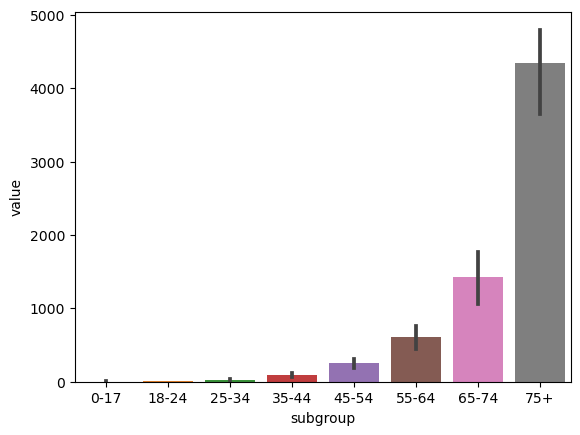

In [700]:
sns.barplot(x = 'subgroup', y = 'value', data = covid_death_age)

In [704]:
covid_death_age_y = covid_death_age[covid_death_age['subgroup'] == '0-17']['value']
covid_death_age_20u = covid_death_age[covid_death_age['subgroup'] == '18-24']['value']
covid_death_age_20o = covid_death_age[covid_death_age['subgroup'] == '25-34']['value']
covid_death_age_30 = covid_death_age[covid_death_age['subgroup'] == '35-44']['value']
covid_death_age_40 = covid_death_age[covid_death_age['subgroup'] == '45-54']['value']
covid_death_age_50 = covid_death_age[covid_death_age['subgroup'] == '55-64']['value']
covid_death_age_60 = covid_death_age[covid_death_age['subgroup'] == '65-74']['value']
covid_death_age_70 = covid_death_age[covid_death_age['subgroup'] == '75+']['value']


stats.f_oneway(covid_death_age_y, covid_death_age_20u, covid_death_age_20o,
               covid_death_age_30,covid_death_age_40,covid_death_age_50,covid_death_age_60,covid_death_age_70)

F_onewayResult(statistic=109.1262161969974, pvalue=1.6888585652652536e-20)

#### 결론 :
#### 인구 10만명당 사망자 비율은 나이대별로 따졌을 때 유의미한 차이가 난다.
#### 나이대가 많아질 수록 크게 증가한다.


In [714]:
#나이별 감염자 수 , CONFIRMED_CASE_RATE
covid_confirmed_age=covid_long[covid_long['종류']=='CONFIRMED_CASE_RATE'].groupby('group').get_group('Age')
covid_confirmed_age

,group,subgroup,variable,value,지역,종류
1,Age,0-17,BK_CONFIRMED_CASE_RATE,70551.57,BK_,CONFIRMED_CASE_RATE
2,Age,18-24,BK_CONFIRMED_CASE_RATE,35637.20,BK_,CONFIRMED_CASE_RATE
3,Age,25-34,BK_CONFIRMED_CASE_RATE,36256.20,BK_,CONFIRMED_CASE_RATE
4,Age,35-44,BK_CONFIRMED_CASE_RATE,36669.31,BK_,CONFIRMED_CASE_RATE
5,Age,45-54,BK_CONFIRMED_CASE_RATE,34713.20,BK_,CONFIRMED_CASE_RATE
6,Age,55-64,BK_CONFIRMED_CASE_RATE,32132.22,BK_,CONFIRMED_CASE_RATE
7,Age,65-74,BK_CONFIRMED_CASE_RATE,29328.92,BK_,CONFIRMED_CASE_RATE
8,Age,75+,BK_CONFIRMED_CASE_RATE,29038.13,BK_,CONFIRMED_CASE_RATE
16,Age,0-17,BX_CONFIRMED_CASE_RATE,68664.58,BX_,CONFIRMED_CASE_RATE
17,Age,18-24,BX_CONFIRMED_CASE_RATE,29631.08,BX_,CONFIRMED_CASE_RATE


<AxesSubplot:xlabel='subgroup', ylabel='value'>

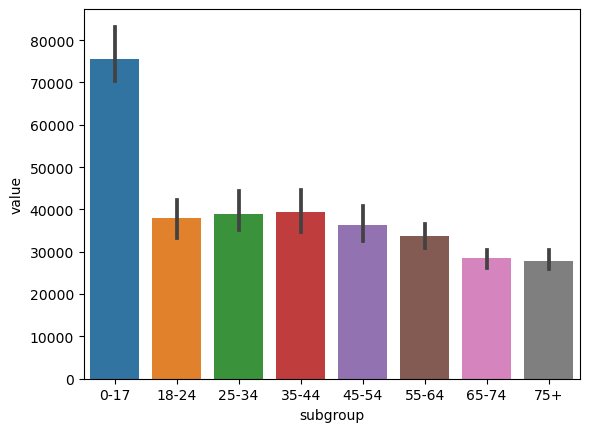

In [701]:
sns.barplot(x = 'subgroup', y = 'value', data = covid_confirmed_age)

In [705]:
covid_confirmed_age_0 = covid_confirmed_age[covid_confirmed_age['subgroup'] == '0-17']['value']
covid_confirmed_age_1 = covid_confirmed_age[covid_confirmed_age['subgroup'] == '18-24']['value']
covid_confirmed_age_2 = covid_confirmed_age[covid_confirmed_age['subgroup'] == '25-34']['value']
covid_confirmed_age_3 = covid_confirmed_age[covid_confirmed_age['subgroup'] == '35-44']['value']
covid_confirmed_age_4 = covid_confirmed_age[covid_confirmed_age['subgroup'] == '45-54']['value']
covid_confirmed_age_5 = covid_confirmed_age[covid_confirmed_age['subgroup'] == '55-64']['value']
covid_confirmed_age_6 = covid_confirmed_age[covid_confirmed_age['subgroup'] == '65-74']['value']
covid_confirmed_age_7 = covid_confirmed_age[covid_confirmed_age['subgroup'] == '75+']['value']


stats.f_oneway(covid_confirmed_age_0, covid_confirmed_age_1, covid_confirmed_age_2,
               covid_confirmed_age_3,covid_confirmed_age_4,covid_confirmed_age_5,covid_confirmed_age_6,covid_confirmed_age_7)

F_onewayResult(statistic=37.36934950720634, pvalue=1.2073466933010327e-13)

#### 결론 :
#### 인구 10만명당 감열비율은 나이대별로 따졌을 때 유의미한 차이가 난다.
#### 특히 10대에서 가장 많은 비율로 감염되었다.

In [715]:
#나이별 입원자 수 , HOSPITALIZED_RATE
covid_hospitalized_age=covid_long[covid_long['종류']=='HOSPITALIZED_RATE'].groupby('group').get_group('Age')
covid_hospitalized_age

,group,subgroup,variable,value,지역,종류
76,Age,0-17,BK_HOSPITALIZED_RATE,1371.90,BK_,HOSPITALIZED_RATE
77,Age,18-24,BK_HOSPITALIZED_RATE,943.09,BK_,HOSPITALIZED_RATE
78,Age,25-34,BK_HOSPITALIZED_RATE,1066.08,BK_,HOSPITALIZED_RATE
79,Age,35-44,BK_HOSPITALIZED_RATE,1407.88,BK_,HOSPITALIZED_RATE
80,Age,45-54,BK_HOSPITALIZED_RATE,2104.17,BK_,HOSPITALIZED_RATE
81,Age,55-64,BK_HOSPITALIZED_RATE,3550.49,BK_,HOSPITALIZED_RATE
82,Age,65-74,BK_HOSPITALIZED_RATE,5850.85,BK_,HOSPITALIZED_RATE
83,Age,75+,BK_HOSPITALIZED_RATE,11962.62,BK_,HOSPITALIZED_RATE
91,Age,0-17,BX_HOSPITALIZED_RATE,1820.43,BX_,HOSPITALIZED_RATE
92,Age,18-24,BX_HOSPITALIZED_RATE,1186.28,BX_,HOSPITALIZED_RATE


<AxesSubplot:xlabel='subgroup', ylabel='value'>

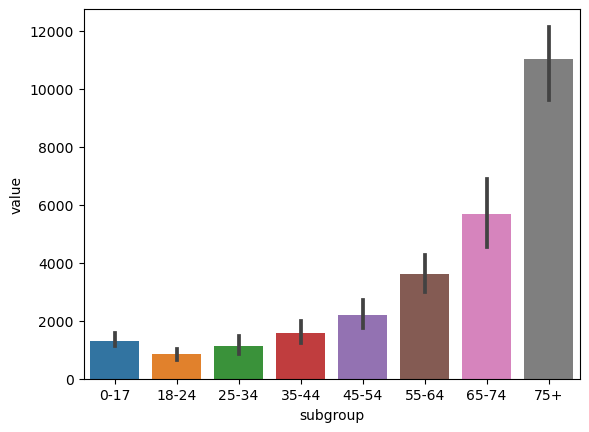

In [703]:
sns.barplot(x = 'subgroup', y = 'value', data = covid_hospitalized_age)

In [708]:
covid_hospitalized_age0 = covid_hospitalized_age[covid_hospitalized_age['subgroup'] == '0-17']['value']
covid_hospitalized_age1 = covid_hospitalized_age[covid_hospitalized_age['subgroup'] == '18-24']['value']
covid_hospitalized_age2 = covid_hospitalized_age[covid_hospitalized_age['subgroup'] == '25-34']['value']
covid_hospitalized_age3 = covid_hospitalized_age[covid_hospitalized_age['subgroup'] == '35-44']['value']
covid_hospitalized_age4 = covid_hospitalized_age[covid_hospitalized_age['subgroup'] == '45-54']['value']
covid_hospitalized_age5 = covid_hospitalized_age[covid_hospitalized_age['subgroup'] == '55-64']['value']
covid_hospitalized_age6 = covid_hospitalized_age[covid_hospitalized_age['subgroup'] == '65-74']['value']
covid_hospitalized_age7 = covid_hospitalized_age[covid_hospitalized_age['subgroup'] == '75+']['value']


stats.f_oneway(covid_hospitalized_age0, covid_hospitalized_age1, covid_hospitalized_age2,
               covid_hospitalized_age3,covid_hospitalized_age4,covid_hospitalized_age5,covid_hospitalized_age6,covid_hospitalized_age7)

F_onewayResult(statistic=77.36365702619129, pvalue=3.0720007588949105e-18)

#### 결론 :
#### 인구 10만명당 입원비율은 나이대별로 따졌을 때 유의미한 차이가 난다.
#### 10대이하에서 청소년기로 갈때는 줄어들었다가 이후로 점점커지며, 50대 60대에서 커지는 폭이 커지며, 70대에 가장 많은 비율로 입원하였다.

--------------------------------

### 성별과 관련해서는 T검정을 사용하였다.

In [710]:
covid_sex=XX.groupby('group').get_group('Sex')
covid_sex

,group,subgroup,BK_CONFIRMED_CASE_RATE,BX_CONFIRMED_CASE_RATE,MN_CONFIRMED_CASE_RATE,QN_CONFIRMED_CASE_RATE,SI_CONFIRMED_CASE_RATE,BK_HOSPITALIZED_RATE,BX_HOSPITALIZED_RATE,MN_HOSPITALIZED_RATE,QN_HOSPITALIZED_RATE,SI_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_DEATH_RATE,MN_DEATH_RATE,QN_DEATH_RATE,SI_DEATH_RATE
16,Sex,Female,33206.20,33679.55,31075.16,34897.31,40829.94,2359.63,2980.26,1738.28,2300.15,2447.17,473.10,499.29,322.67,483.55,505.28
17,Sex,Male,29956.34,28739.24,28961.55,31653.67,38874.34,2494.65,3201.41,2073.16,2727.88,2731.16,642.88,713.17,437.47,709.85,629.40


In [711]:
covid_age_long

,group,subgroup,variable,value,지역,종류
0,Boroughwide,Boroughwide,BK_CONFIRMED_CASE_RATE,31750.30,BK_,CONFIRMED_CASE_RATE
1,Age,0-17,BK_CONFIRMED_CASE_RATE,70551.57,BK_,CONFIRMED_CASE_RATE
2,Age,18-24,BK_CONFIRMED_CASE_RATE,35637.20,BK_,CONFIRMED_CASE_RATE
3,Age,25-34,BK_CONFIRMED_CASE_RATE,36256.20,BK_,CONFIRMED_CASE_RATE
4,Age,35-44,BK_CONFIRMED_CASE_RATE,36669.31,BK_,CONFIRMED_CASE_RATE
...,...,...,...,...,...,...
220,Race/ethnicity,Black/African-American,SI_DEATH_RATE,636.85,SI_,DEATH_RATE
221,Race/ethnicity,Hispanic/Latino,SI_DEATH_RATE,643.23,SI_,DEATH_RATE
222,Race/ethnicity,White,SI_DEATH_RATE,418.42,SI_,DEATH_RATE
223,Sex,Female,SI_DEATH_RATE,505.28,SI_,DEATH_RATE


In [724]:
#나이별 입원자 수 , CONFIRMED_CASE_RATE
covid_confirmed_case_sex=covid_long[covid_long['종류']=='CONFIRMED_CASE_RATE'].groupby('group').get_group('Sex')
covid_confirmed_case_sex

,group,subgroup,variable,value,지역,종류
13,Sex,Female,BK_CONFIRMED_CASE_RATE,33206.20,BK_,CONFIRMED_CASE_RATE
14,Sex,Male,BK_CONFIRMED_CASE_RATE,29956.34,BK_,CONFIRMED_CASE_RATE
28,Sex,Female,BX_CONFIRMED_CASE_RATE,33679.55,BX_,CONFIRMED_CASE_RATE
29,Sex,Male,BX_CONFIRMED_CASE_RATE,28739.24,BX_,CONFIRMED_CASE_RATE
43,Sex,Female,MN_CONFIRMED_CASE_RATE,31075.16,MN_,CONFIRMED_CASE_RATE
44,Sex,Male,MN_CONFIRMED_CASE_RATE,28961.55,MN_,CONFIRMED_CASE_RATE
58,Sex,Female,QN_CONFIRMED_CASE_RATE,34897.31,QN_,CONFIRMED_CASE_RATE
59,Sex,Male,QN_CONFIRMED_CASE_RATE,31653.67,QN_,CONFIRMED_CASE_RATE
73,Sex,Female,SI_CONFIRMED_CASE_RATE,40829.94,SI_,CONFIRMED_CASE_RATE
74,Sex,Male,SI_CONFIRMED_CASE_RATE,38874.34,SI_,CONFIRMED_CASE_RATE


<AxesSubplot:xlabel='subgroup', ylabel='value'>

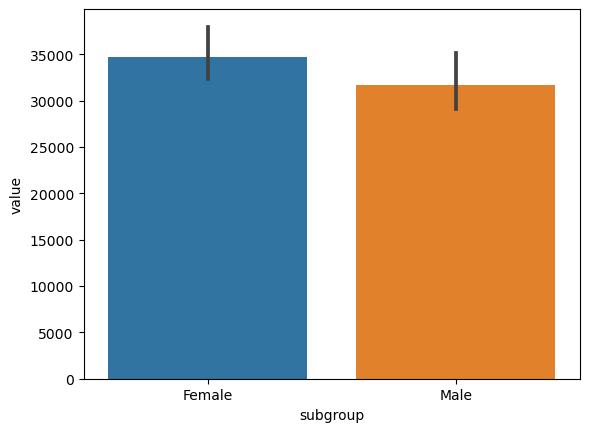

In [721]:
sns.barplot(x = 'subgroup', y = 'value', data=covid_confirmed_case_sex)

In [723]:
# 대립가설 : 성별에 따라 확진자 수가 차이가 날것이다.
m_covid_confirmed_case_sex = covid_confirmed_case_sex[covid_confirmed_case_sex['subgroup'] == 'Male']['value']
f_covid_confirmed_case_sex = covid_confirmed_case_sex[covid_confirmed_case_sex['subgroup'] == 'Female']['value']
# t-검정(t-독립검정)
stats.ttest_ind(m_covid_confirmed_case_sex,f_covid_confirmed_case_sex,equal_var=False) #equal_var: 분산모름

Ttest_indResult(statistic=-1.241338094515611, pvalue=0.25025267994091316)

#### 결론 : 
#### 성별 별로 확진자 수에 차이가 날 것으로 보았으나, statistic의 절대값이 2보다 작고 pvalue가 0.05보다 크므로
#### 서로관은 상관관계가 없다고 본다.

In [732]:
#나이별 입원자 수 , HOSPITALIZED_RATE
covid_hospitalized_sex=covid_long[covid_long['종류']=='HOSPITALIZED_RATE'].groupby('group').get_group('Sex')
covid_hospitalized_sex

,group,subgroup,variable,value,지역,종류
88,Sex,Female,BK_HOSPITALIZED_RATE,2359.63,BK_,HOSPITALIZED_RATE
89,Sex,Male,BK_HOSPITALIZED_RATE,2494.65,BK_,HOSPITALIZED_RATE
103,Sex,Female,BX_HOSPITALIZED_RATE,2980.26,BX_,HOSPITALIZED_RATE
104,Sex,Male,BX_HOSPITALIZED_RATE,3201.41,BX_,HOSPITALIZED_RATE
118,Sex,Female,MN_HOSPITALIZED_RATE,1738.28,MN_,HOSPITALIZED_RATE
119,Sex,Male,MN_HOSPITALIZED_RATE,2073.16,MN_,HOSPITALIZED_RATE
133,Sex,Female,QN_HOSPITALIZED_RATE,2300.15,QN_,HOSPITALIZED_RATE
134,Sex,Male,QN_HOSPITALIZED_RATE,2727.88,QN_,HOSPITALIZED_RATE
148,Sex,Female,SI_HOSPITALIZED_RATE,2447.17,SI_,HOSPITALIZED_RATE
149,Sex,Male,SI_HOSPITALIZED_RATE,2731.16,SI_,HOSPITALIZED_RATE


<AxesSubplot:xlabel='subgroup', ylabel='value'>

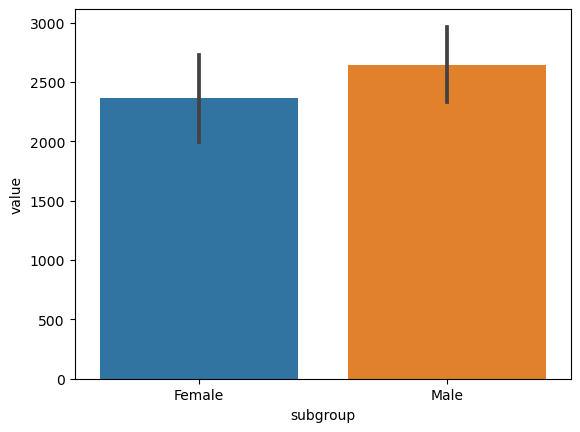

In [733]:
sns.barplot(x = 'subgroup', y = 'value', data=covid_hospitalized_sex)

In [735]:
# 대립가설 : 성별에 따라 입원 환자 수가 차이가 날것이다.
m_covid_hospitalized_sex = covid_hospitalized_sex[covid_hospitalized_sex['subgroup'] == 'Male']['value']
f_covid_hospitalized_sex = covid_hospitalized_sex[covid_hospitalized_sex['subgroup'] == 'Female']['value']
# t-검정(t-독립검정)
stats.ttest_ind(m_covid_hospitalized_sex,f_covid_hospitalized_sex,equal_var=False) #equal_var: 분산모름

Ttest_indResult(statistic=1.0398745273836651, pvalue=0.32896681315505666)

#### 결론 : 
#### 성별 별로 입원환자 수에 차이가 날 것으로 보았으나, statistic의 절대값이 2보다 작고 pvalue가 0.05보다 크므로
#### 서로관은 상관관계가 없다고 본다.

In [736]:
#나이별 입원자 수 , DEATH_RATE
covid_death_sex=covid_long[covid_long['종류']=='DEATH_RATE'].groupby('group').get_group('Sex')
covid_death_sex

,group,subgroup,variable,value,지역,종류
163,Sex,Female,BK_DEATH_RATE,473.10,BK_,DEATH_RATE
164,Sex,Male,BK_DEATH_RATE,642.88,BK_,DEATH_RATE
178,Sex,Female,BX_DEATH_RATE,499.29,BX_,DEATH_RATE
179,Sex,Male,BX_DEATH_RATE,713.17,BX_,DEATH_RATE
193,Sex,Female,MN_DEATH_RATE,322.67,MN_,DEATH_RATE
194,Sex,Male,MN_DEATH_RATE,437.47,MN_,DEATH_RATE
208,Sex,Female,QN_DEATH_RATE,483.55,QN_,DEATH_RATE
209,Sex,Male,QN_DEATH_RATE,709.85,QN_,DEATH_RATE
223,Sex,Female,SI_DEATH_RATE,505.28,SI_,DEATH_RATE
224,Sex,Male,SI_DEATH_RATE,629.40,SI_,DEATH_RATE


<AxesSubplot:xlabel='subgroup', ylabel='value'>

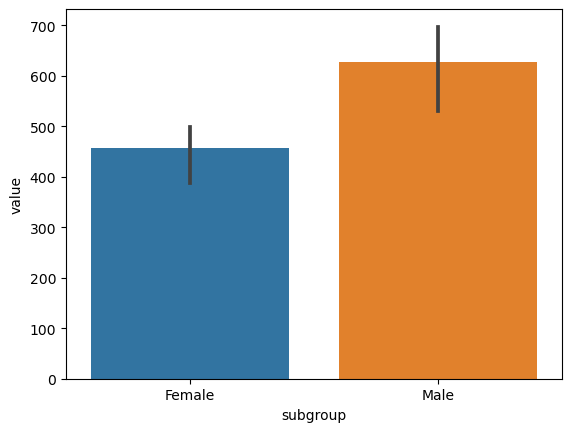

In [737]:
sns.barplot(x = 'subgroup', y = 'value', data=covid_death_sex)

In [738]:
# 대립가설 : 성별에 따라 입원 환자 수가 차이가 날것이다.
m_covid_death_sex = covid_death_sex[covid_death_sex['subgroup'] == 'Male']['value']
f_covid_death_sex = covid_death_sex[covid_death_sex['subgroup'] == 'Female']['value']
# t-검정(t-독립검정)
stats.ttest_ind(m_covid_death_sex,f_covid_death_sex,equal_var=False) #equal_var: 분산모름

Ttest_indResult(statistic=2.798754916219501, pvalue=0.026456415302112093)

#### 결론 : 
#### 성별 별로 사망자 수가, statistic의 절대값이 2보다 크고, pvalue 값이 0.05보다 작으므로 유의미한 관계가 있다고 본다.

### 인종별 관련해서는 T검정을 사용하였다.

In [741]:
covid_race=XX.groupby('group').get_group('Race/ethnicity')
covid_race

,group,subgroup,BK_CONFIRMED_CASE_RATE,BX_CONFIRMED_CASE_RATE,MN_CONFIRMED_CASE_RATE,QN_CONFIRMED_CASE_RATE,SI_CONFIRMED_CASE_RATE,BK_HOSPITALIZED_RATE,BX_HOSPITALIZED_RATE,MN_HOSPITALIZED_RATE,QN_HOSPITALIZED_RATE,SI_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_DEATH_RATE,MN_DEATH_RATE,QN_DEATH_RATE,SI_DEATH_RATE
12,Race/ethnicity,Asian/Pacific-Islander,25699.14,26414.54,24569.25,26154.85,28395.39,1281.16,2086.60,929.10,1440.12,1095.28,323.97,375.52,230.22,328.28,295.03
13,Race/ethnicity,Black/African-American,21414.56,24759.45,25961.55,23924.84,29780.70,2490.25,3238.86,3099.58,2238.24,3004.42,554.70,608.25,515.30,484.91,636.85
14,Race/ethnicity,Hispanic/Latino,28800.42,28340.85,26799.65,32256.20,37710.00,2470.71,2716.25,2220.02,2734.85,3448.37,565.66,550.52,422.07,590.73,643.23
15,Race/ethnicity,White,23953.84,26641.72,21906.70,25617.41,35542.32,1862.41,2314.91,833.43,1550.88,1895.88,433.00,451.16,166.67,386.91,418.42


In [750]:
#인종별 확진자 수 , CONFIRMED_CASE_RATE
covid_confirmed_case_race=covid_long[covid_long['종류']=='CONFIRMED_CASE_RATE'].groupby('group').get_group('Race/ethnicity')
covid_confirmed_case_race

,group,subgroup,variable,value,지역,종류
9,Race/ethnicity,Asian/Pacific-Islander,BK_CONFIRMED_CASE_RATE,25699.14,BK_,CONFIRMED_CASE_RATE
10,Race/ethnicity,Black/African-American,BK_CONFIRMED_CASE_RATE,21414.56,BK_,CONFIRMED_CASE_RATE
11,Race/ethnicity,Hispanic/Latino,BK_CONFIRMED_CASE_RATE,28800.42,BK_,CONFIRMED_CASE_RATE
12,Race/ethnicity,White,BK_CONFIRMED_CASE_RATE,23953.84,BK_,CONFIRMED_CASE_RATE
24,Race/ethnicity,Asian/Pacific-Islander,BX_CONFIRMED_CASE_RATE,26414.54,BX_,CONFIRMED_CASE_RATE
25,Race/ethnicity,Black/African-American,BX_CONFIRMED_CASE_RATE,24759.45,BX_,CONFIRMED_CASE_RATE
26,Race/ethnicity,Hispanic/Latino,BX_CONFIRMED_CASE_RATE,28340.85,BX_,CONFIRMED_CASE_RATE
27,Race/ethnicity,White,BX_CONFIRMED_CASE_RATE,26641.72,BX_,CONFIRMED_CASE_RATE
39,Race/ethnicity,Asian/Pacific-Islander,MN_CONFIRMED_CASE_RATE,24569.25,MN_,CONFIRMED_CASE_RATE
40,Race/ethnicity,Black/African-American,MN_CONFIRMED_CASE_RATE,25961.55,MN_,CONFIRMED_CASE_RATE


<AxesSubplot:xlabel='subgroup', ylabel='value'>

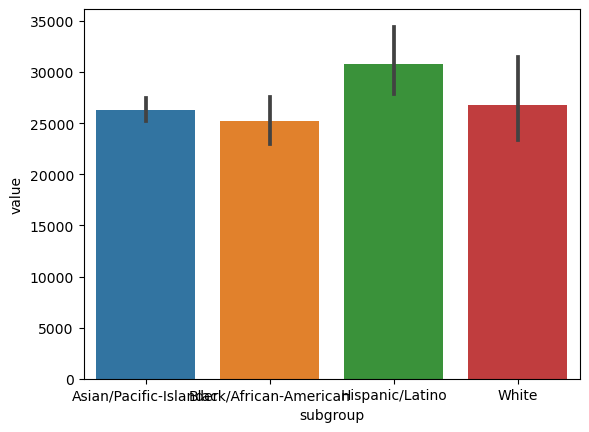

In [744]:
sns.barplot(x = 'subgroup', y = 'value', data = covid_confirmed_case_race)

In [743]:
covid_confirmed_case_race0 = covid_confirmed_case_race[covid_confirmed_case_race['subgroup'] == 'Asian/Pacific-Islander']['value']
covid_confirmed_case_race1 = covid_confirmed_case_race[covid_confirmed_case_race['subgroup'] == 'Black/African-American']['value']
covid_confirmed_case_race2 = covid_confirmed_case_race[covid_confirmed_case_race['subgroup'] == 'Hispanic/Latino']['value']
covid_confirmed_case_race3 = covid_confirmed_case_race[covid_confirmed_case_race['subgroup'] == 'White']['value']

stats.f_oneway(covid_confirmed_case_race0, covid_confirmed_case_race1, covid_confirmed_case_race2,
               covid_confirmed_case_race3)

F_onewayResult(statistic=2.084562312031827, pvalue=0.14257963103151164)

#### 결론 :
#### statistic의 절대값이 2가 넘으나 pvalue 값이 0.05보다 커서 이 값은 우연히 나왔을 가능성이 있으므로 다른 조사가 더 필요하다.

In [751]:
#인종별 입원자 수 , CONFIRMED_CASE_RATE
covid_hospital_race=covid_long[covid_long['종류']=='HOSPITALIZED_RATE'].groupby('group').get_group('Race/ethnicity')
covid_hospital_race

,group,subgroup,variable,value,지역,종류
84,Race/ethnicity,Asian/Pacific-Islander,BK_HOSPITALIZED_RATE,1281.16,BK_,HOSPITALIZED_RATE
85,Race/ethnicity,Black/African-American,BK_HOSPITALIZED_RATE,2490.25,BK_,HOSPITALIZED_RATE
86,Race/ethnicity,Hispanic/Latino,BK_HOSPITALIZED_RATE,2470.71,BK_,HOSPITALIZED_RATE
87,Race/ethnicity,White,BK_HOSPITALIZED_RATE,1862.41,BK_,HOSPITALIZED_RATE
99,Race/ethnicity,Asian/Pacific-Islander,BX_HOSPITALIZED_RATE,2086.60,BX_,HOSPITALIZED_RATE
100,Race/ethnicity,Black/African-American,BX_HOSPITALIZED_RATE,3238.86,BX_,HOSPITALIZED_RATE
101,Race/ethnicity,Hispanic/Latino,BX_HOSPITALIZED_RATE,2716.25,BX_,HOSPITALIZED_RATE
102,Race/ethnicity,White,BX_HOSPITALIZED_RATE,2314.91,BX_,HOSPITALIZED_RATE
114,Race/ethnicity,Asian/Pacific-Islander,MN_HOSPITALIZED_RATE,929.10,MN_,HOSPITALIZED_RATE
115,Race/ethnicity,Black/African-American,MN_HOSPITALIZED_RATE,3099.58,MN_,HOSPITALIZED_RATE


<AxesSubplot:xlabel='subgroup', ylabel='value'>

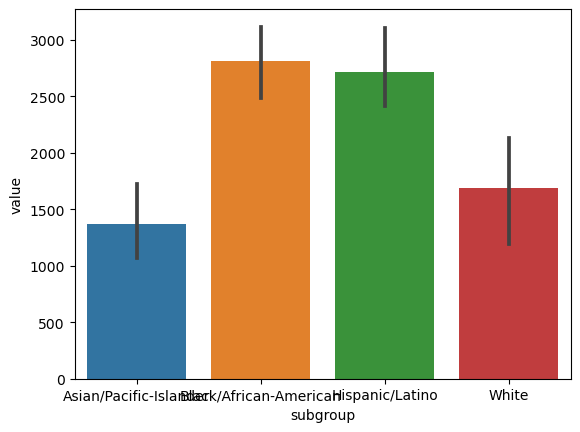

In [752]:
sns.barplot(x = 'subgroup', y = 'value', data = covid_hospital_race)

In [753]:
covid_hospital_race0 = covid_hospital_race[covid_hospital_race['subgroup'] == 'Asian/Pacific-Islander']['value']
covid_hospital_race1 = covid_hospital_race[covid_hospital_race['subgroup'] == 'Black/African-American']['value']
covid_hospital_race2 = covid_hospital_race[covid_hospital_race['subgroup'] == 'Hispanic/Latino']['value']
covid_hospital_race3 = covid_hospital_race[covid_hospital_race['subgroup'] == 'White']['value']

stats.f_oneway(covid_hospital_race0, covid_hospital_race1, covid_hospital_race2,
               covid_hospital_race3)

F_onewayResult(statistic=11.798522790266038, pvalue=0.00025041388944942796)

#### 결과 :
#### 이 데이터는 미국에서 4개의 주의 사는 사람을 대상으로 한 데이터이다.
#### statistic가 11이고, pvalue값이 0.05보다 작으므로 충분히 유용한 데이터로 사료된다.
#### 하지만, 각 인종별 소득 수준 데이터를 가져와서 비교해보면 좋을 것 같다. (우리가 해야해?)

In [754]:
#인종별 사망자 수 , DEATH_RATE
covid_death_race=covid_long[covid_long['종류']=='DEATH_RATE'].groupby('group').get_group('Race/ethnicity')
covid_death_race

,group,subgroup,variable,value,지역,종류
159,Race/ethnicity,Asian/Pacific-Islander,BK_DEATH_RATE,323.97,BK_,DEATH_RATE
160,Race/ethnicity,Black/African-American,BK_DEATH_RATE,554.70,BK_,DEATH_RATE
161,Race/ethnicity,Hispanic/Latino,BK_DEATH_RATE,565.66,BK_,DEATH_RATE
162,Race/ethnicity,White,BK_DEATH_RATE,433.00,BK_,DEATH_RATE
174,Race/ethnicity,Asian/Pacific-Islander,BX_DEATH_RATE,375.52,BX_,DEATH_RATE
175,Race/ethnicity,Black/African-American,BX_DEATH_RATE,608.25,BX_,DEATH_RATE
176,Race/ethnicity,Hispanic/Latino,BX_DEATH_RATE,550.52,BX_,DEATH_RATE
177,Race/ethnicity,White,BX_DEATH_RATE,451.16,BX_,DEATH_RATE
189,Race/ethnicity,Asian/Pacific-Islander,MN_DEATH_RATE,230.22,MN_,DEATH_RATE
190,Race/ethnicity,Black/African-American,MN_DEATH_RATE,515.30,MN_,DEATH_RATE


<AxesSubplot:xlabel='subgroup', ylabel='value'>

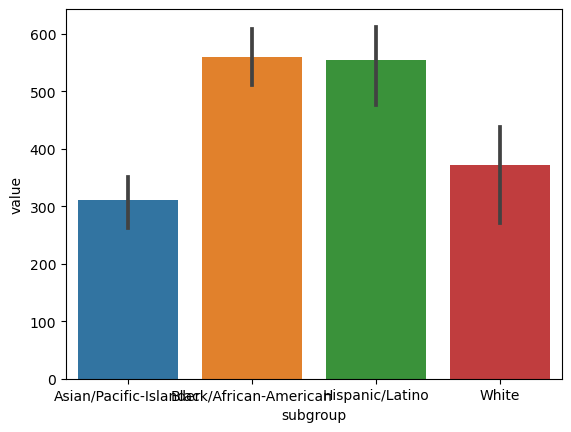

In [755]:
sns.barplot(x = 'subgroup', y = 'value', data = covid_death_race)

In [756]:
covid_death_race0 = covid_death_race[covid_death_race['subgroup'] == 'Asian/Pacific-Islander']['value']
covid_death_race1 = covid_death_race[covid_death_race['subgroup'] == 'Black/African-American']['value']
covid_death_race2 = covid_death_race[covid_death_race['subgroup'] == 'Hispanic/Latino']['value']
covid_death_race3 = covid_death_race[covid_death_race['subgroup'] == 'White']['value']

stats.f_oneway(covid_death_race0, covid_death_race1, covid_death_race2,
               covid_death_race3)

F_onewayResult(statistic=11.93342615952301, pvalue=0.00023553595034528642)

#### 결과 :
#### statistic가 11이고, pvalue값이 0.05보다 작으므로 충분히 유용한 데이터로 사료된다.
#### 하지만, 각 인종별 소득 수준 데이터를 가져와서 비교해보면 좋을 것 같다. (우리가 해야해?)